In [2]:
# df = pd.read_csv('./示例数据/order_train1.csv')

# # 筛选出需要的列
# df = df[['sales_chan_name', 'second_cate_code', 'ord_qty']]
# # 计算线上和线下的销售数量
# online_sales = df.loc[df['sales_chan_name'] == 'online'].groupby('second_cate_code').sum()
# offline_sales = df.loc[df['sales_chan_name'] == 'offline'].groupby('second_cate_code').sum()
# # 合并两个DataFrame
# sales = pd.concat([online_sales, offline_sales], axis=1)
# # 重命名列名
# sales.columns = ['online_sales', 'offline_sales']
# # 重置索引
# sales.reset_index(inplace=True)


In [3]:
# import matplotlib.pyplot as plt

# # 设置字体
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# # 绘制柱状图
# plt.bar(sales['second_cate_code'], sales['online_sales'], label='线上销售')
# plt.bar(sales['second_cate_code'], sales['offline_sales'], bottom=sales['online_sales'], label='线下销售')
# plt.xticks(rotation=90)
# plt.xlabel('产品细类编码')
# plt.ylabel('销售数量')
# plt.legend()
# plt.show()



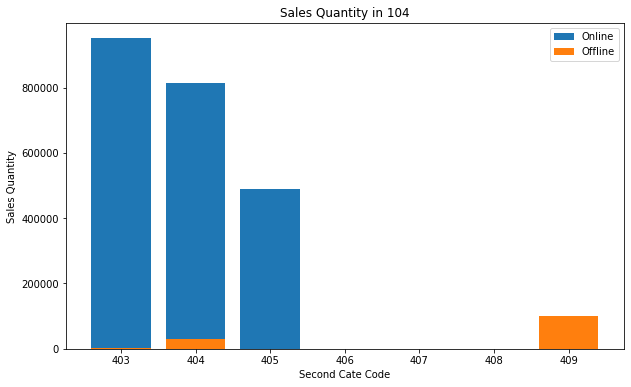

Sales Quantity in 104
sales_chan_name   offline  online    Diff
second_cate_code                         
403                  2789  951261  948472
404                 28610  815496  786886
405                   724  488514  487790
409                 99212    1047  -98165


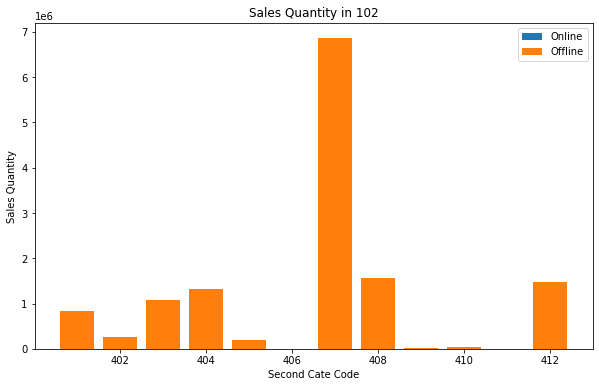

Sales Quantity in 102
sales_chan_name     offline    online       Diff
second_cate_code                                
401                826272.0   10669.0  -815603.0
402                262202.0    6271.0  -255931.0
403               1085966.0   59554.0 -1026412.0
404               1314976.0   49069.0 -1265907.0
405                199255.0   24552.0  -174703.0
406                  5035.0       NaN        NaN
407               6859208.0  123826.0 -6735382.0
408               1552727.0   35691.0 -1517036.0
409                 12410.0    5487.0    -6923.0
410                 36686.0       7.0   -36679.0
411                  3414.0       NaN        NaN
412               1476003.0   20868.0 -1455135.0


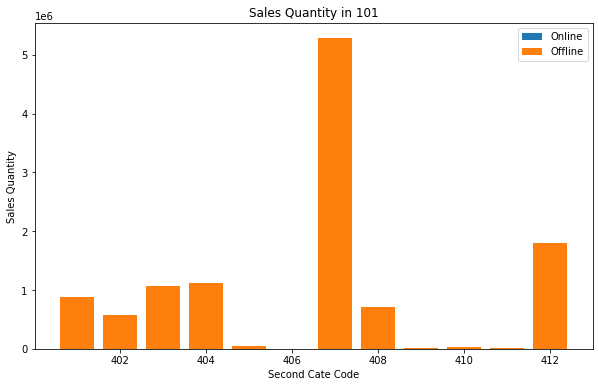

Sales Quantity in 101
sales_chan_name     offline    online       Diff
second_cate_code                                
401                878906.0   59823.0  -819083.0
402                576291.0   28583.0  -547708.0
403               1072573.0   40871.0 -1031702.0
404               1127691.0   26577.0 -1101114.0
405                 50669.0    1292.0   -49377.0
406                  4291.0      10.0    -4281.0
407               5284499.0  367973.0 -4916526.0
408                703461.0   61612.0  -641849.0
409                 10014.0     327.0    -9687.0
410                 24716.0      78.0   -24638.0
411                  5246.0       NaN        NaN
412               1804592.0  272873.0 -1531719.0


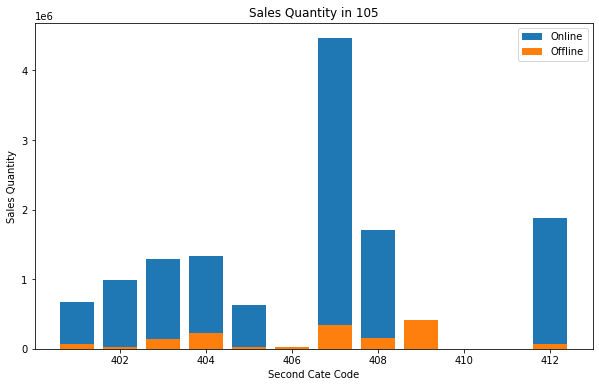

Sales Quantity in 105
sales_chan_name   offline   online     Diff
second_cate_code                           
401                 70779   671063   600284
402                 18901   982000   963099
403                135759  1287180  1151421
404                221248  1329337  1108089
405                 31089   624489   593400
406                 26379        7   -26372
407                346687  4464336  4117649
408                150003  1712874  1562871
409                413166    59535  -353631
410                  2165       29    -2136
411                   375       24     -351
412                 75810  1872767  1796957


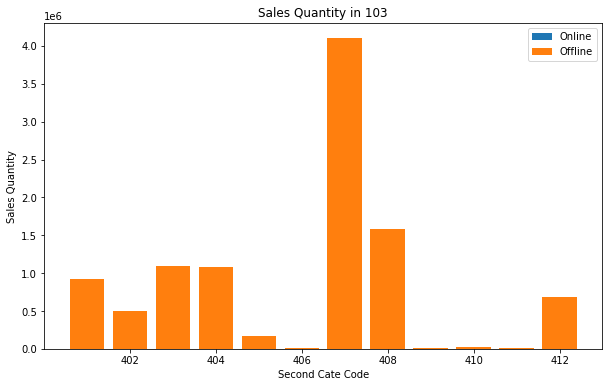

Sales Quantity in 103
sales_chan_name     offline    online       Diff
second_cate_code                                
401                916834.0  172477.0  -744357.0
402                500490.0  156119.0  -344371.0
403               1092713.0     949.0 -1091764.0
404               1080945.0    1474.0 -1079471.0
405                163697.0    2453.0  -161244.0
406                 11324.0       NaN        NaN
407               4102363.0  472131.0 -3630232.0
408               1581964.0  424187.0 -1157777.0
409                 11527.0    5821.0    -5706.0
410                 17991.0      20.0   -17971.0
411                  4681.0       3.0    -4678.0
412                688865.0  113158.0  -575707.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('./示例数据/order_train1.csv')


# 遍历每个销售地区
sales_regions = data['sales_region_code'].unique()
for region in sales_regions:
    # 筛选出当前销售地区的数据
    region_data = data[data['sales_region_code'] == region]
    
    # 统计不同二级分类的线上线下销售情况
    sales_data = region_data.groupby(['second_cate_code', 'sales_chan_name'])['ord_qty'].sum().reset_index()
    
    # 绘制图表
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(sales_data[sales_data['sales_chan_name'] == 'online']['second_cate_code'],
           sales_data[sales_data['sales_chan_name'] == 'online']['ord_qty'], 
           label='Online')
    ax.bar(sales_data[sales_data['sales_chan_name'] == 'offline']['second_cate_code'], 
           sales_data[sales_data['sales_chan_name'] == 'offline']['ord_qty'], 
           label='Offline')
    ax.set_xlabel('Second Cate Code')
    ax.set_ylabel('Sales Quantity')
    ax.set_title(f'Sales Quantity in {region}')
    ax.legend()
    plt.show()

    # 打印表格
    pivot_table = pd.pivot_table(sales_data, values='ord_qty', index=['second_cate_code'], columns=['sales_chan_name'])
    pivot_table['Diff'] = pivot_table['online'] - pivot_table['offline']
    print(f'Sales Quantity in {region}')
    print(pivot_table)


- 写一个函数，判断这些在104销售的商品，转移105销售的情况
- 通过检测在2017年前，104地区销量占总销量90%，同时2017年后，其在105地区占比百分之80%？。如果二者都符合，就是该类商品
- 然后检测该类商品，大部分属于哪些类
    - tips:df1那里，可以选择是不是2017年后只在105地区销售的
    - tips:可以看可视化，检查出有些其实销量很少，需要的话，可以添加一个总销量小于一定值，就不参与筛选的条件

In [5]:
item_104_data = data[data['sales_region_code'] == 104]
item_104_list = item_104_data["item_code"].unique()

<ipython-input-6-5d7c4fb8e676>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


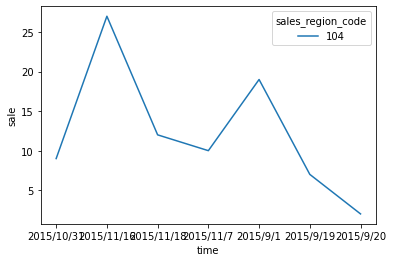

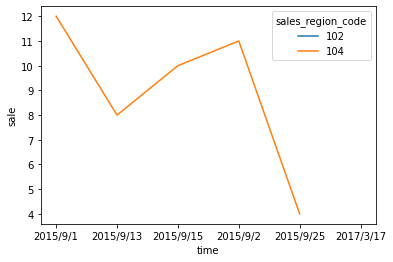

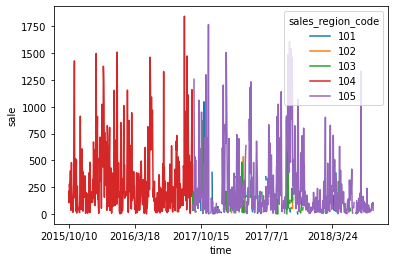

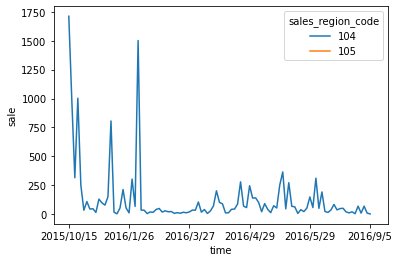

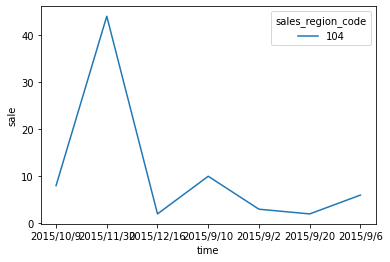

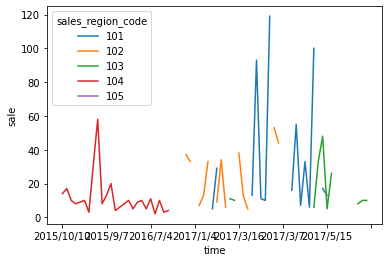

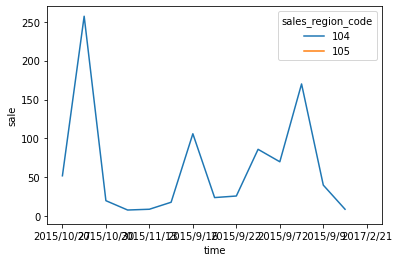

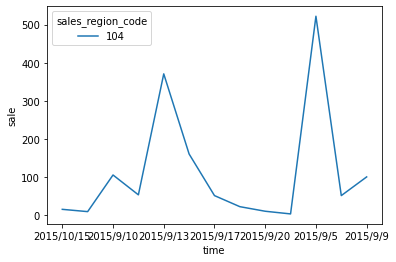

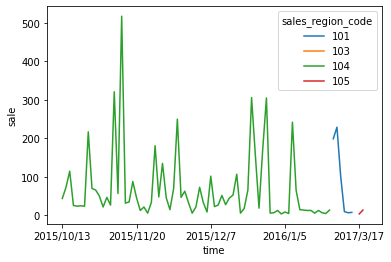

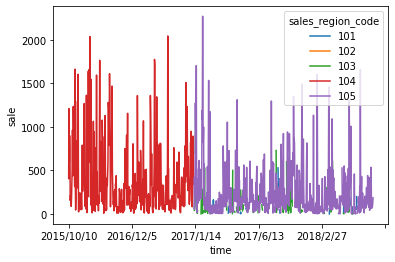

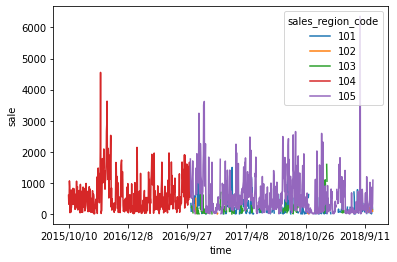

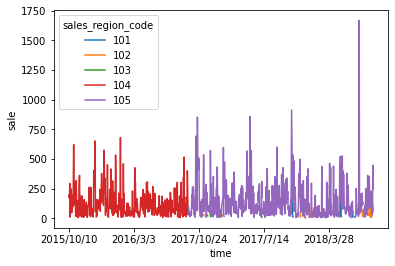

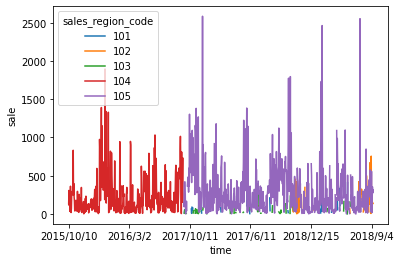

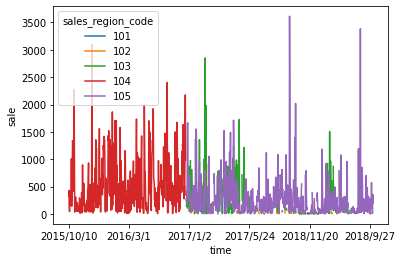

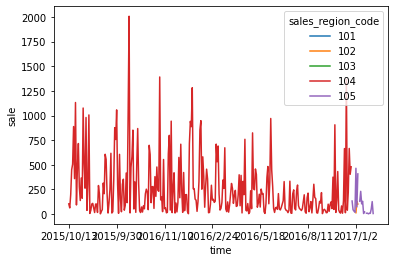

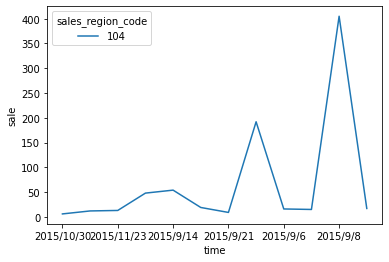

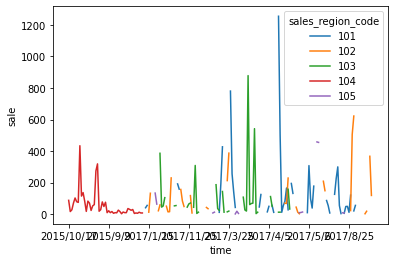

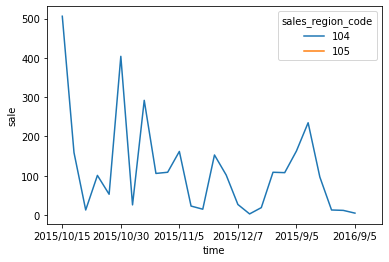

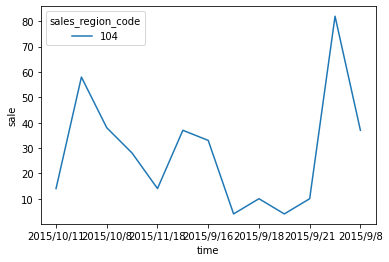

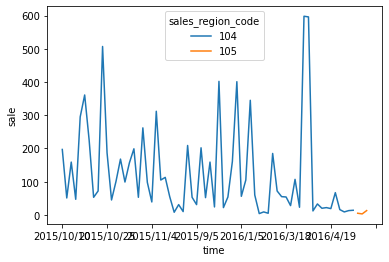

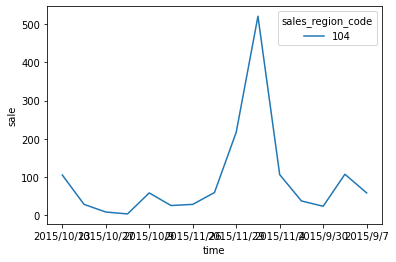

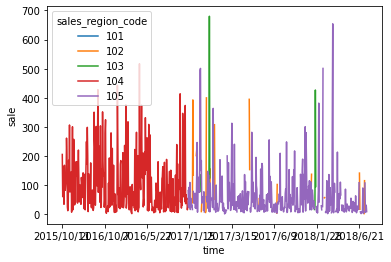

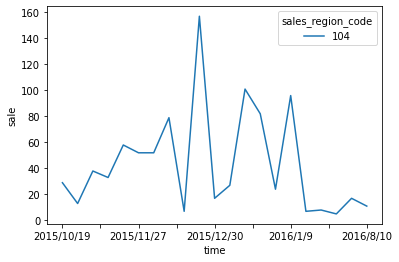

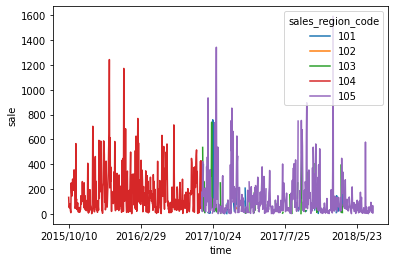

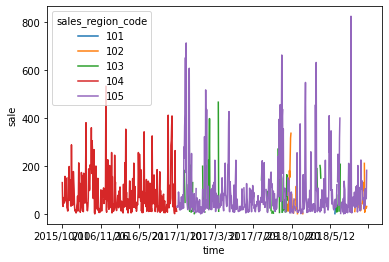

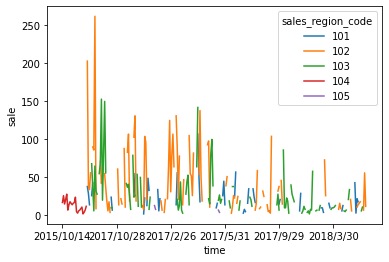

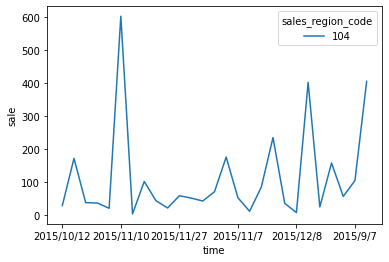

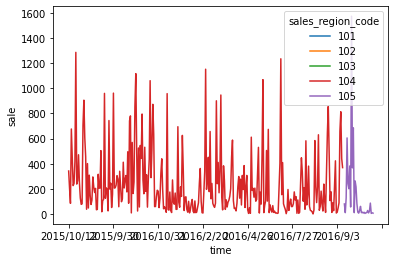

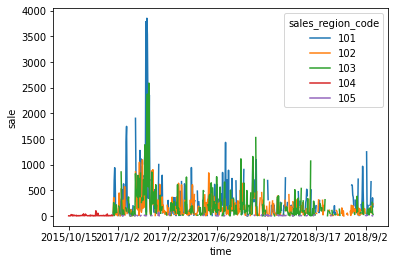

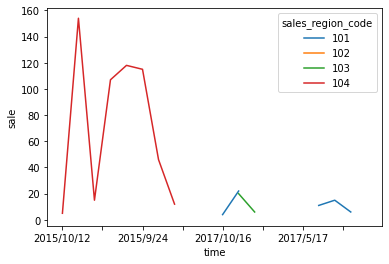

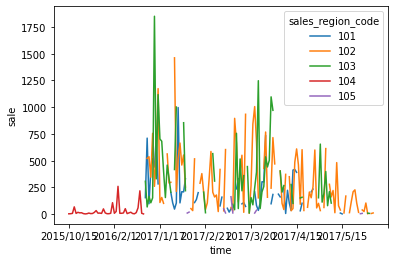

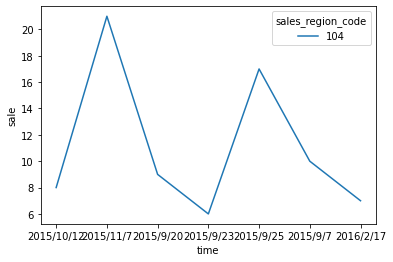

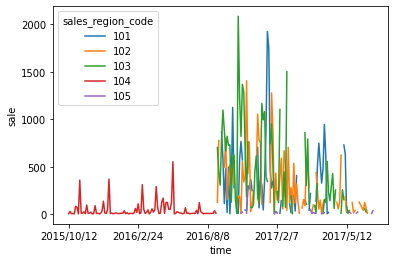

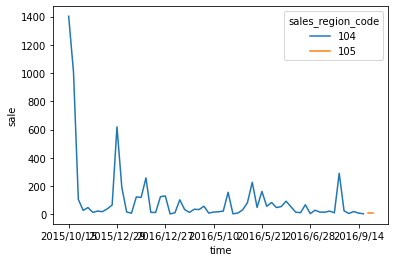

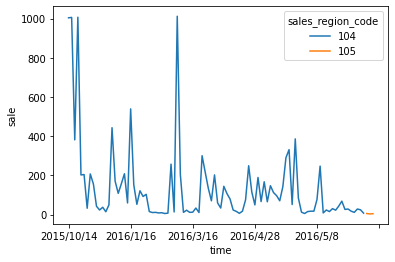

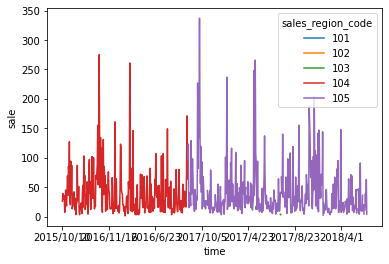

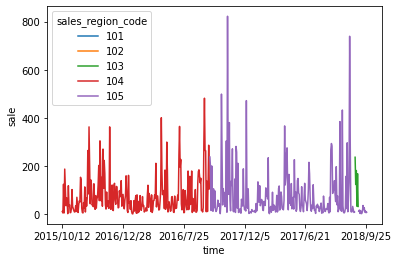

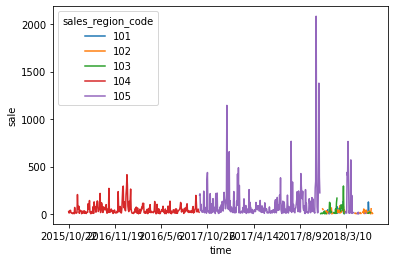

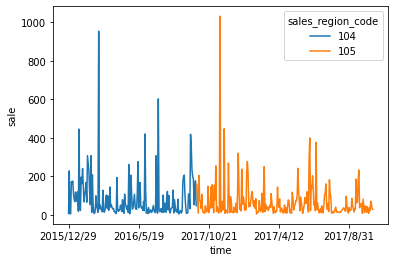

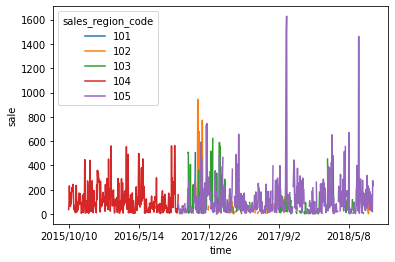

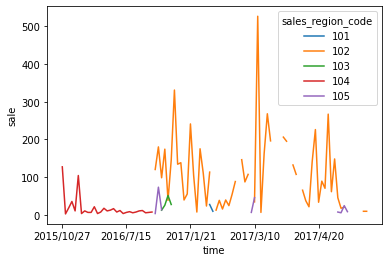

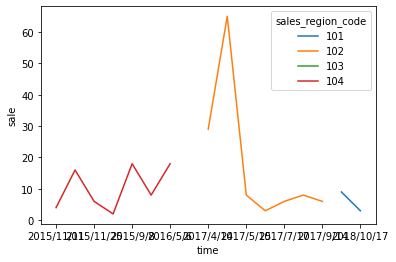

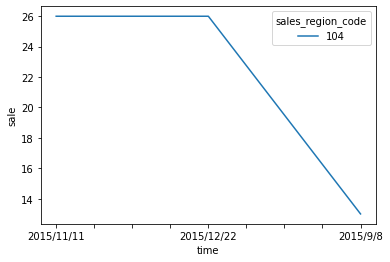

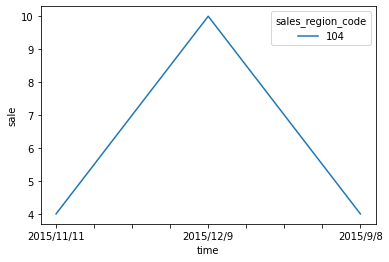

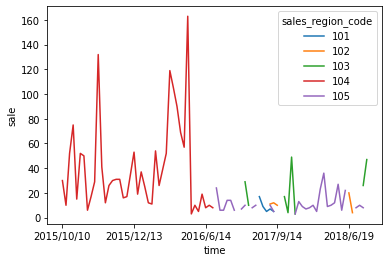

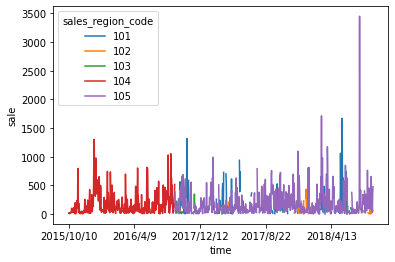

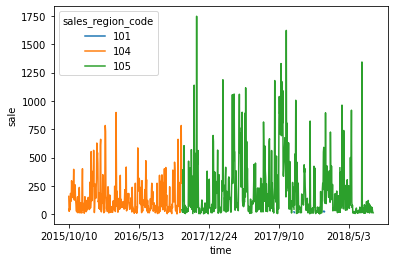

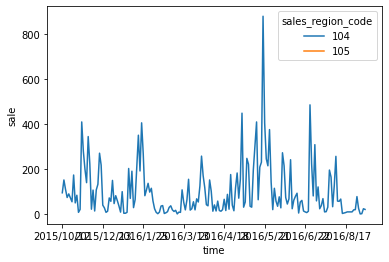

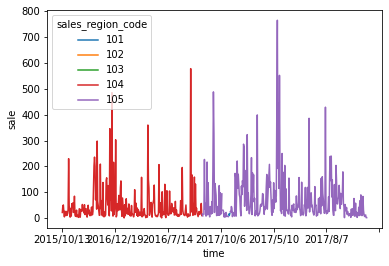

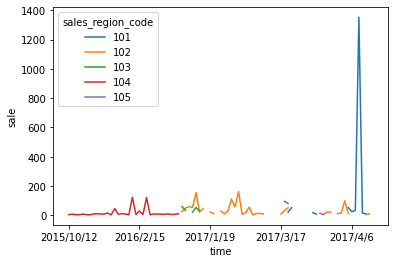

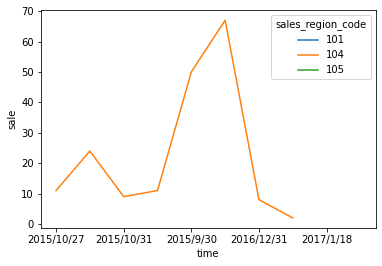

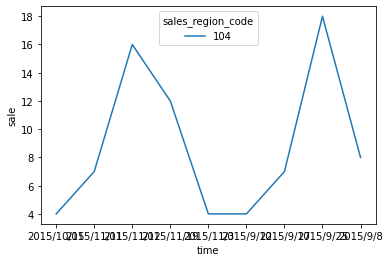

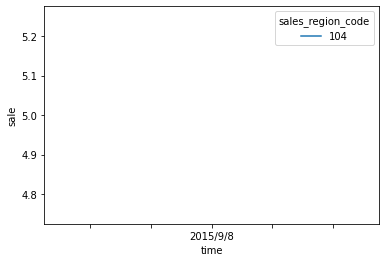

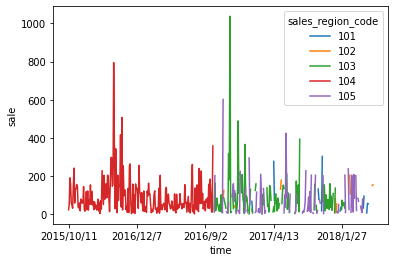

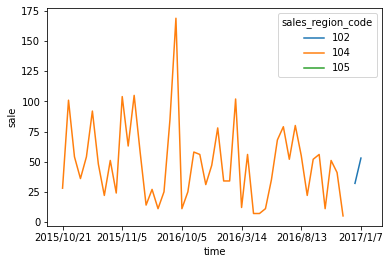

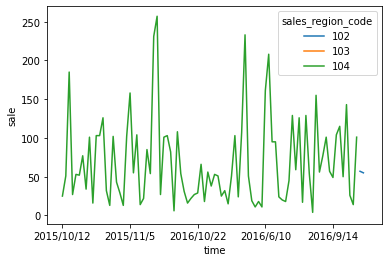

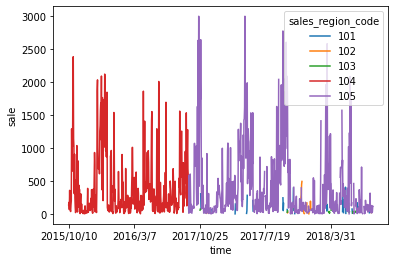

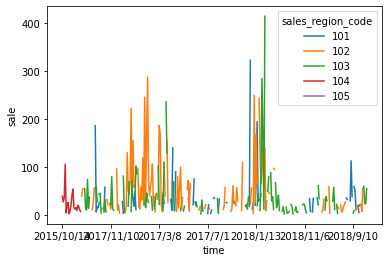

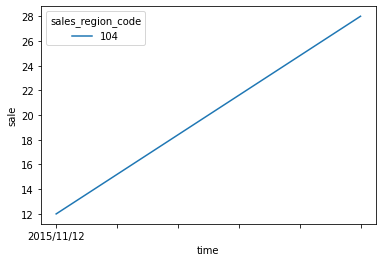

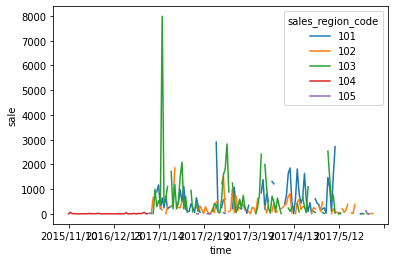

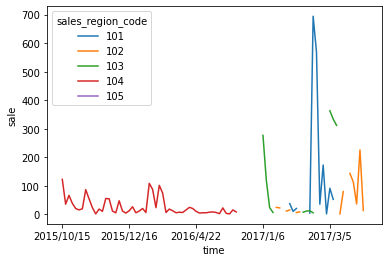

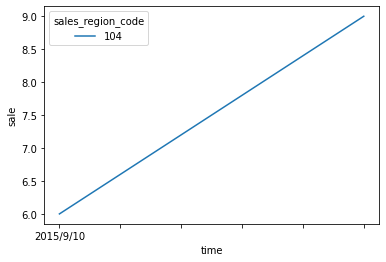

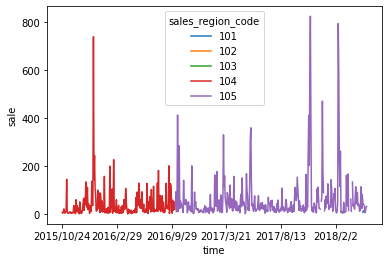

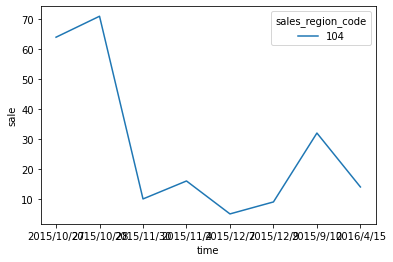

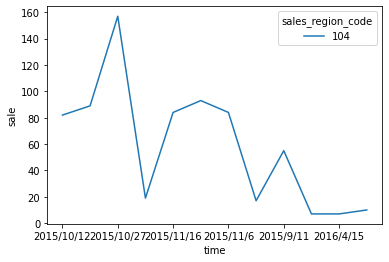

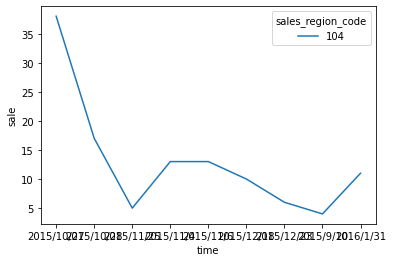

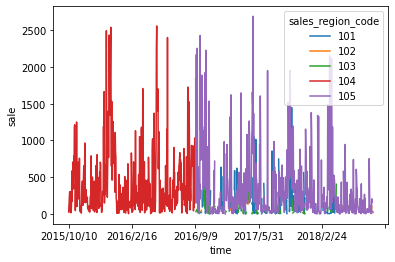

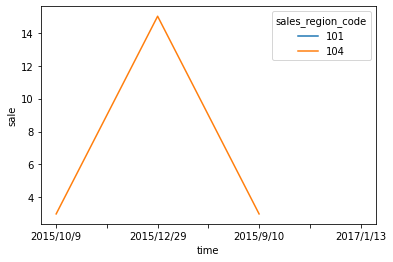

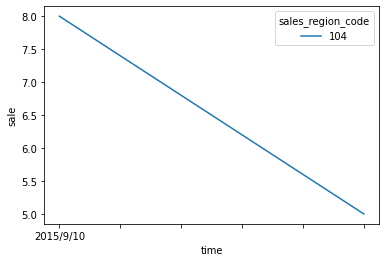

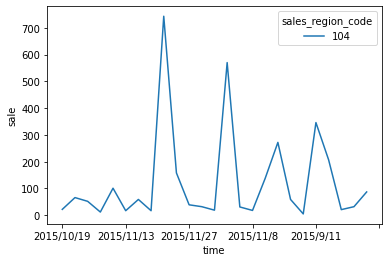

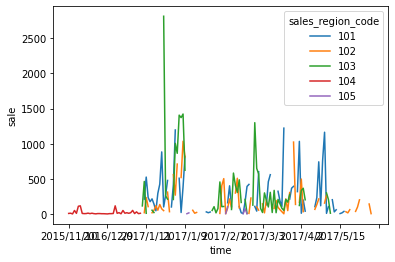

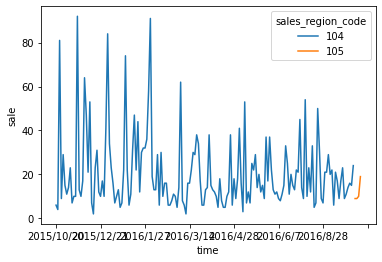

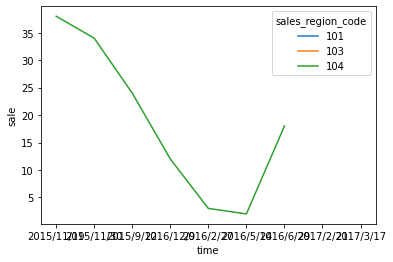

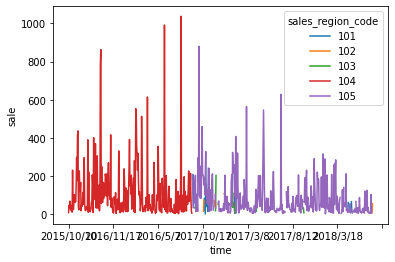

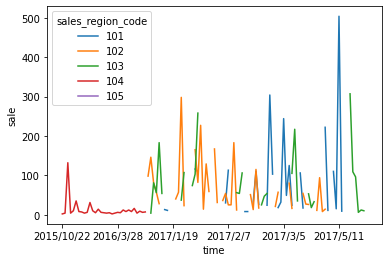

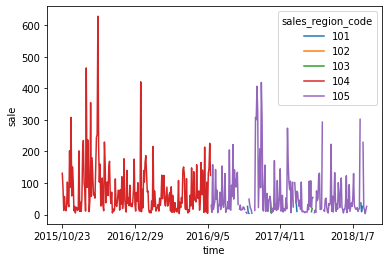

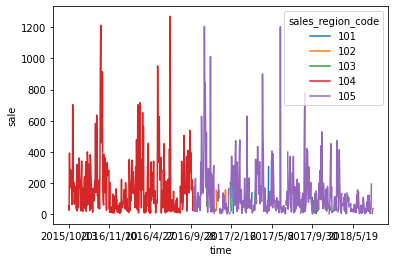

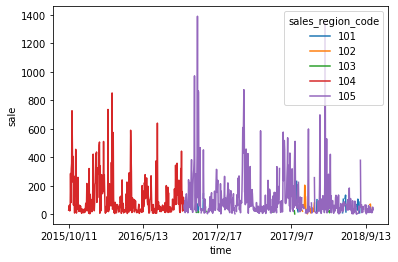

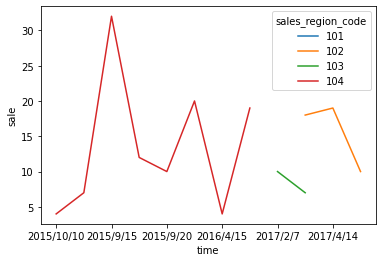

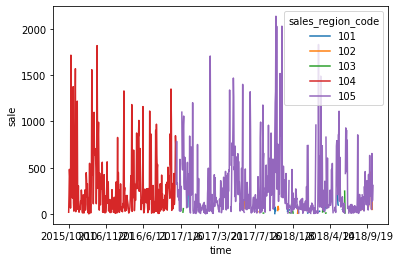

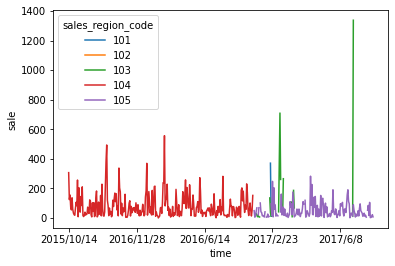

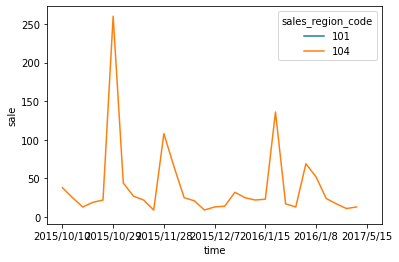

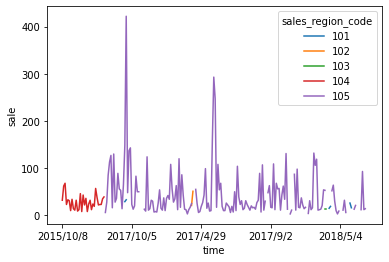

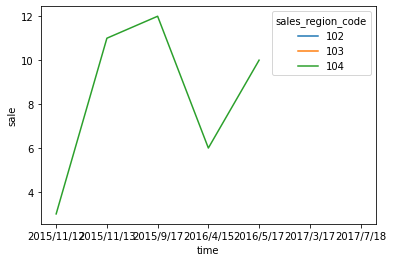

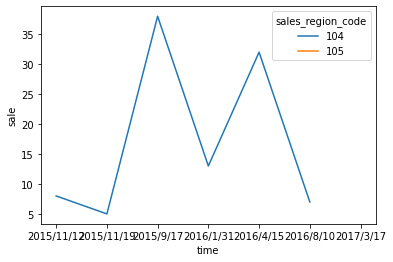

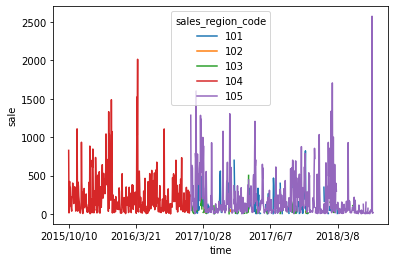

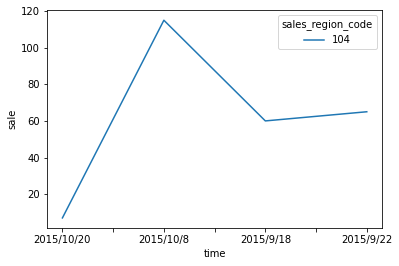

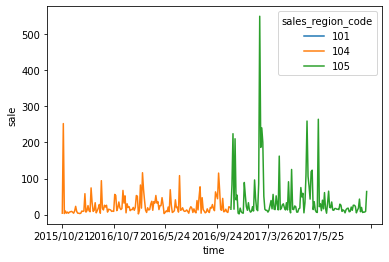

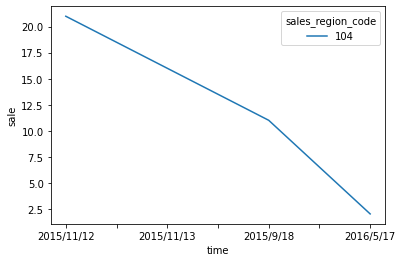

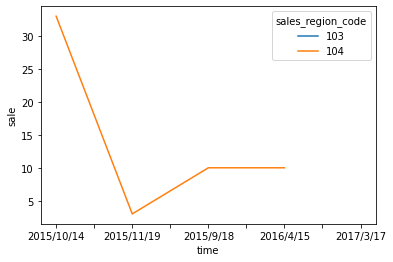

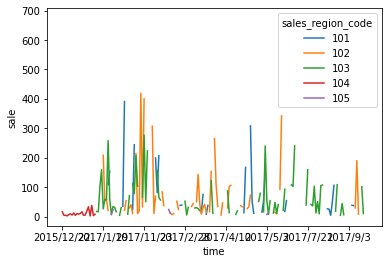

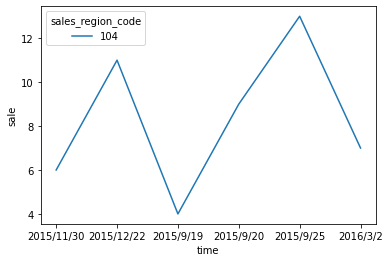

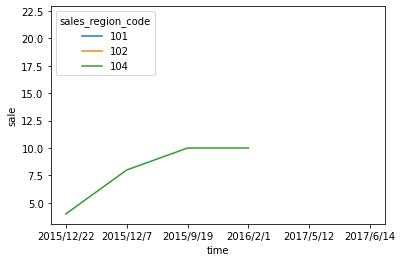

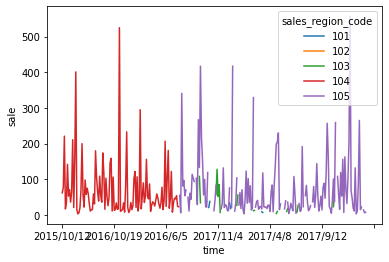

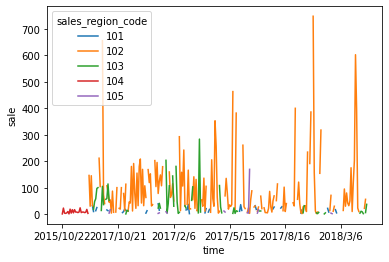

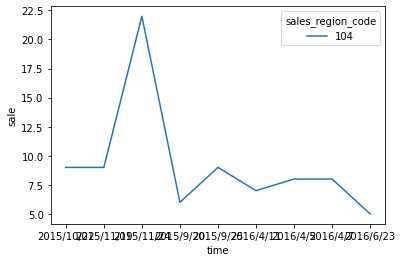

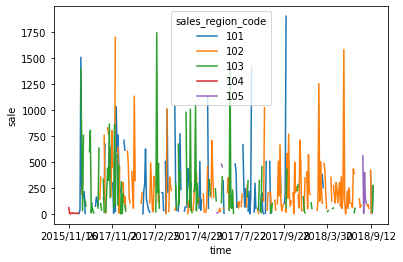

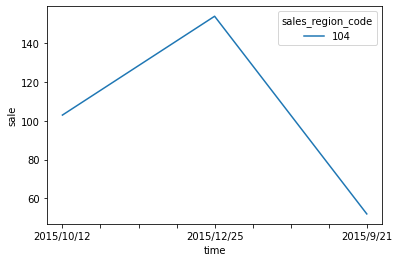

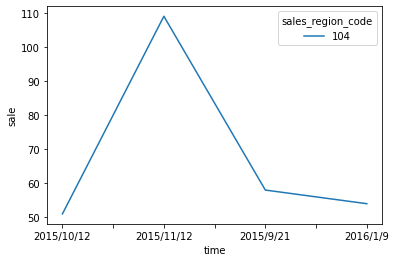

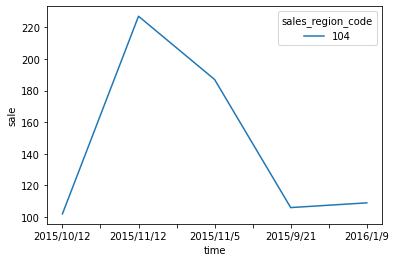

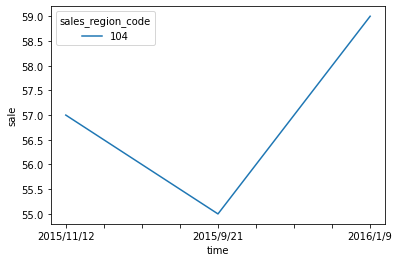

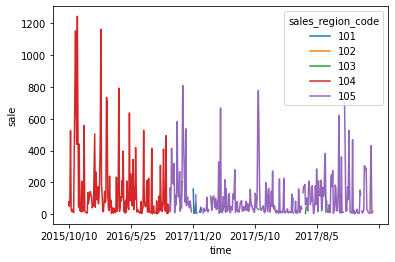

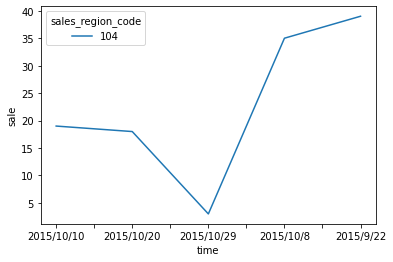

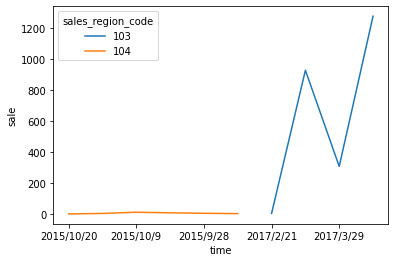

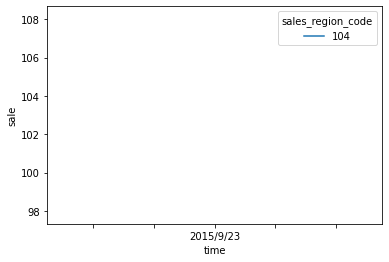

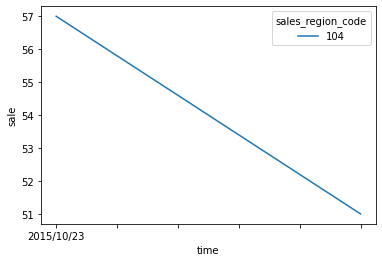

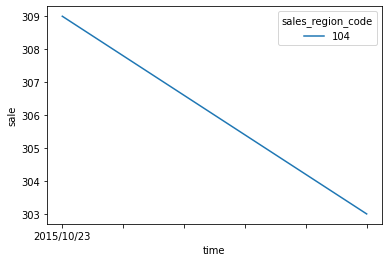

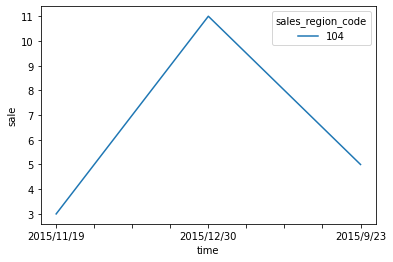

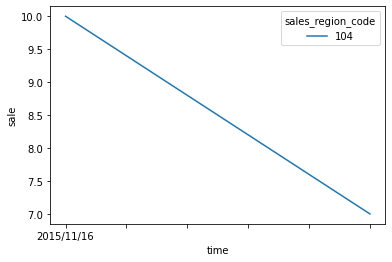

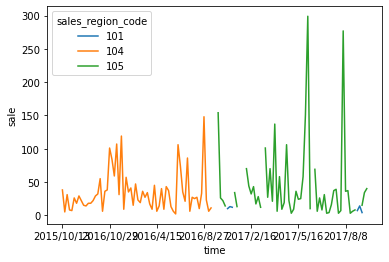

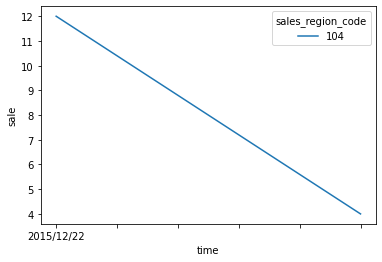

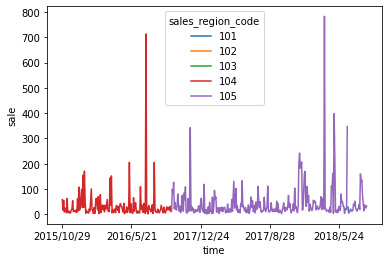

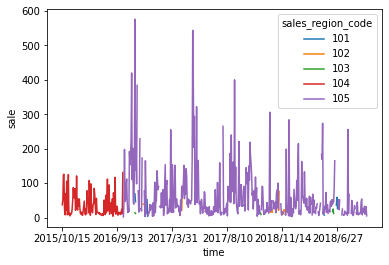

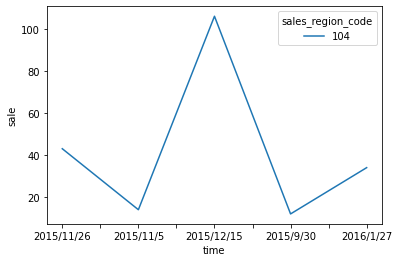

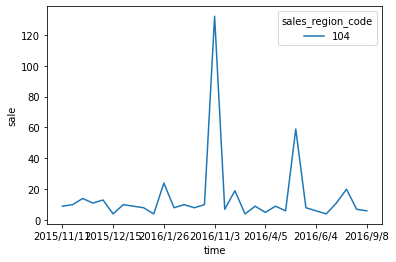

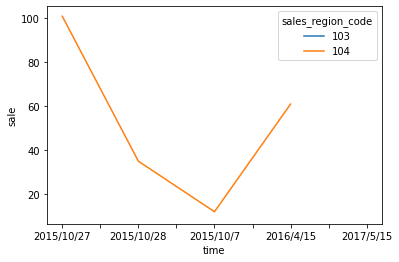

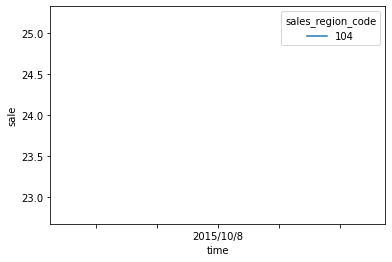

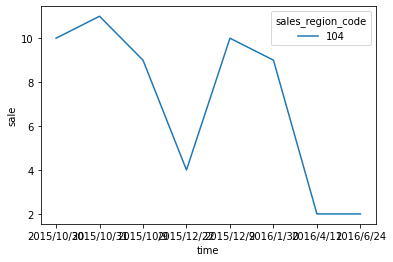

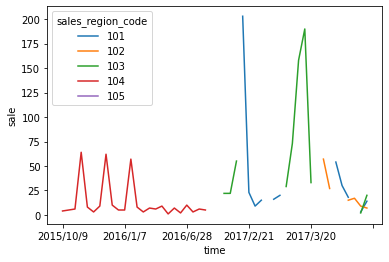

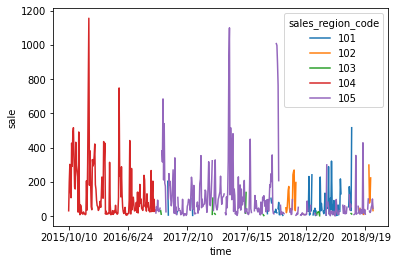

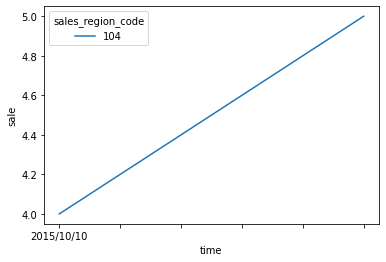

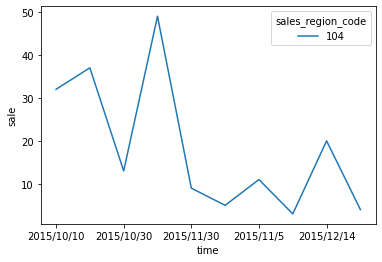

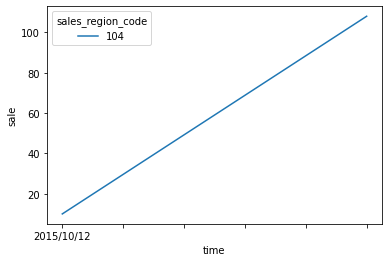

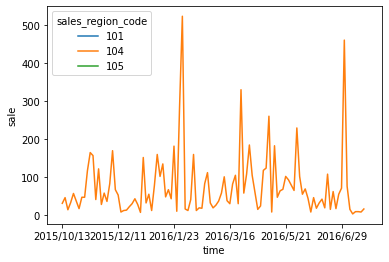

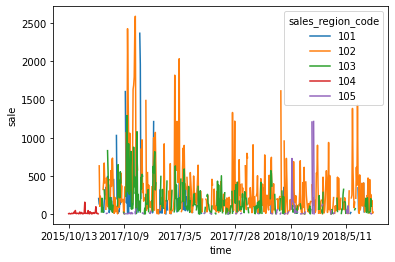

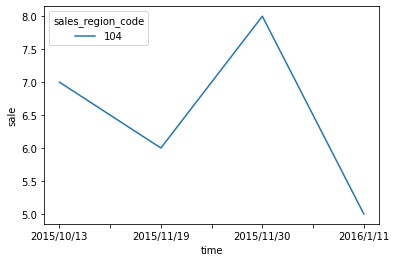

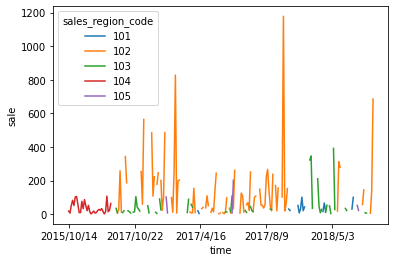

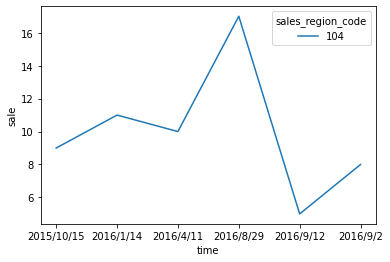

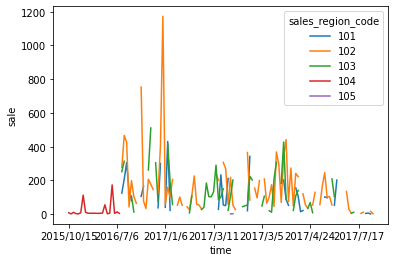

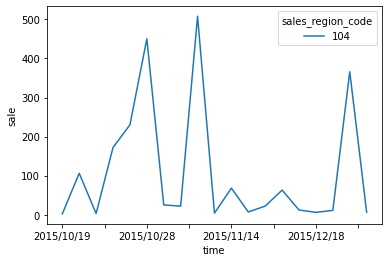

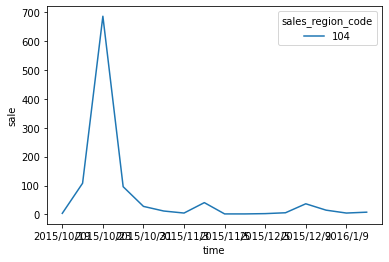

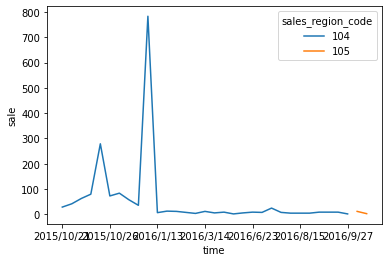

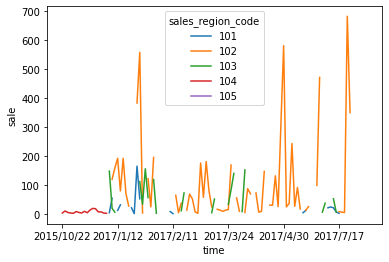

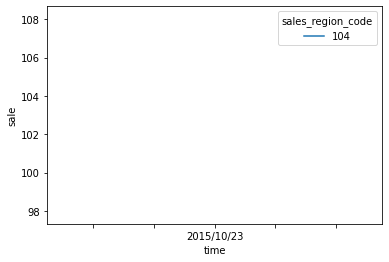

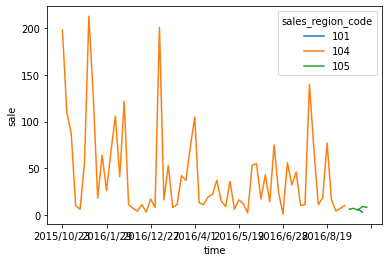

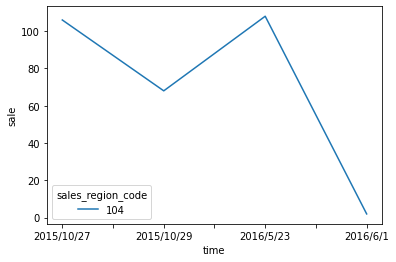

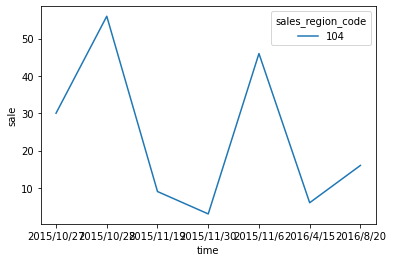

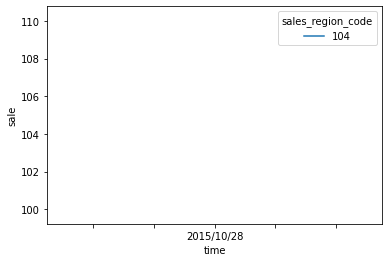

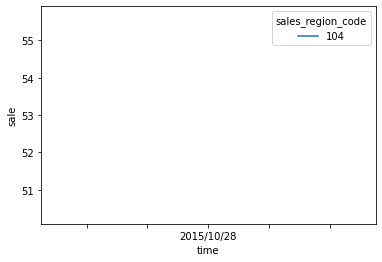

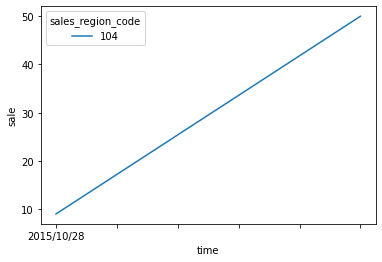

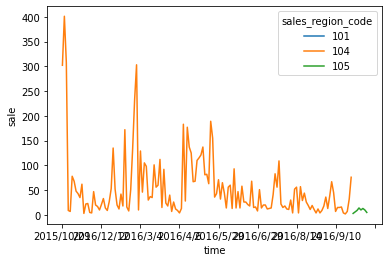

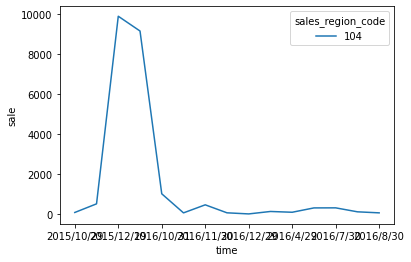

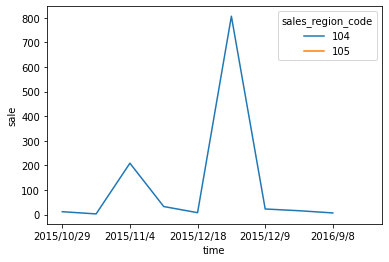

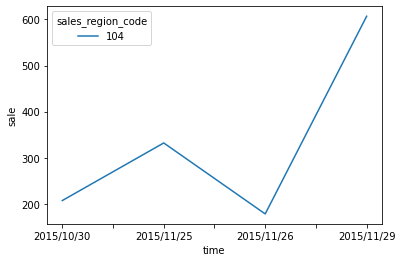

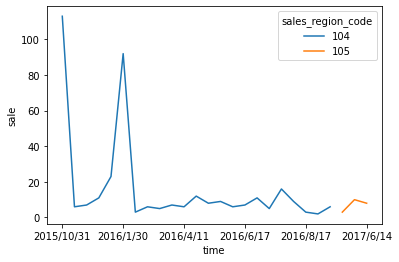

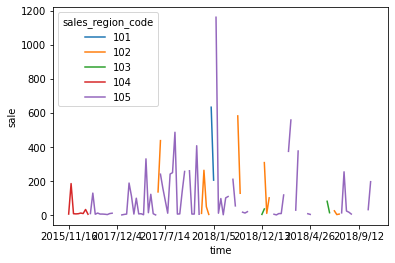

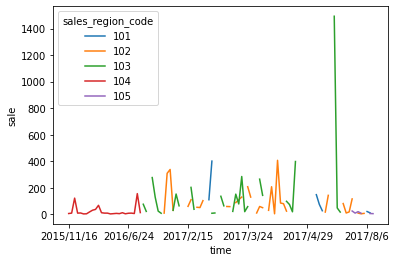

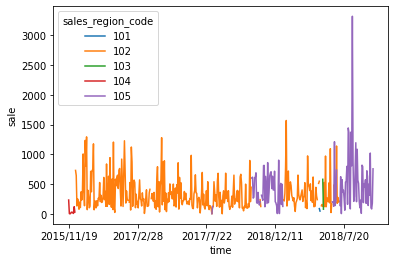

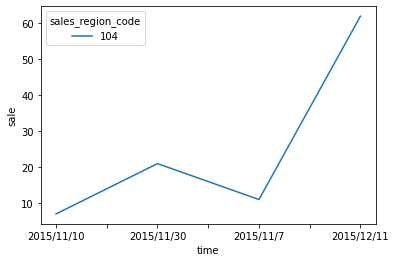

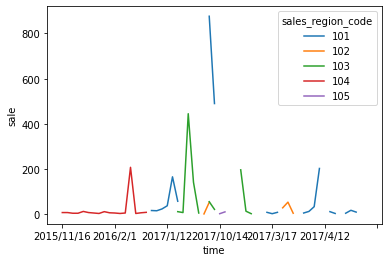

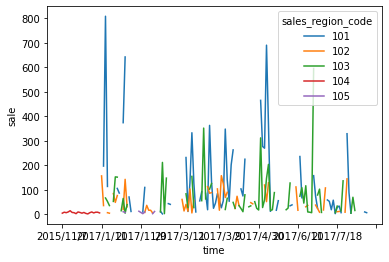

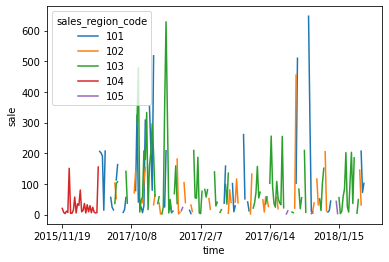

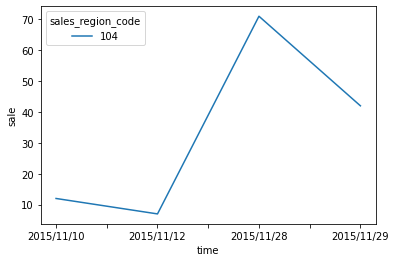

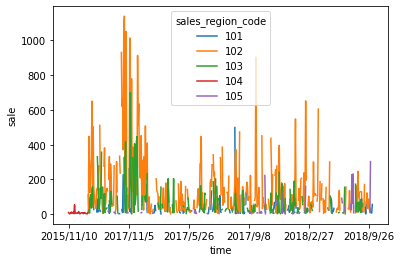

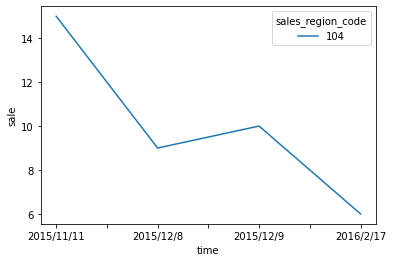

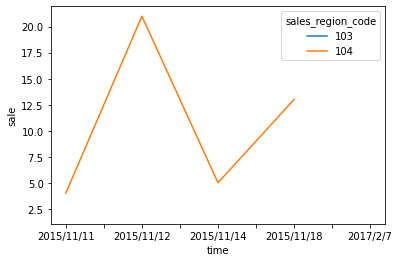

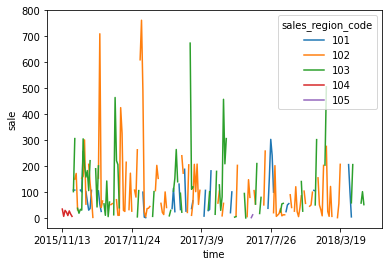

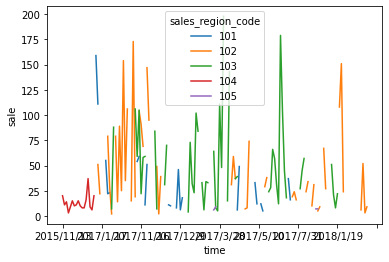

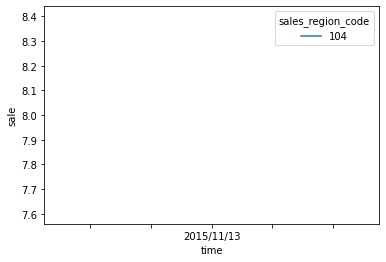

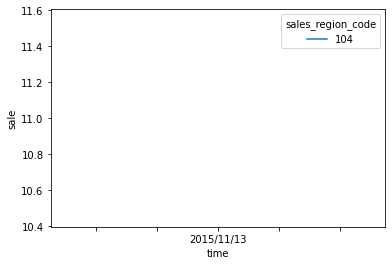

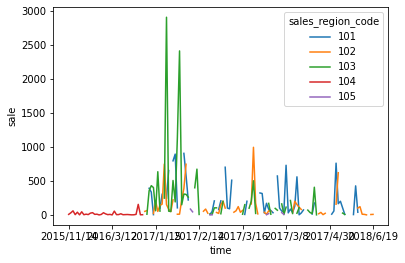

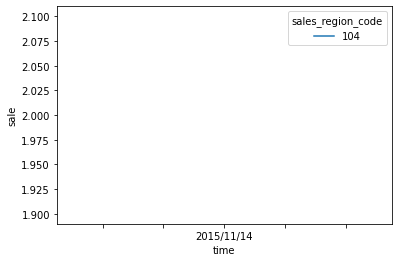

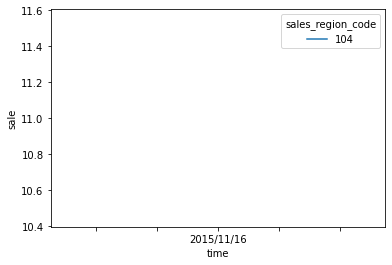

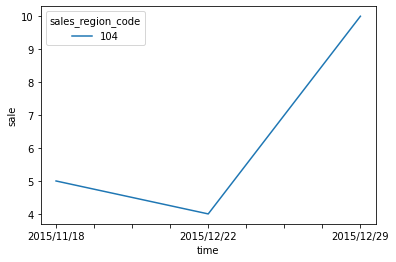

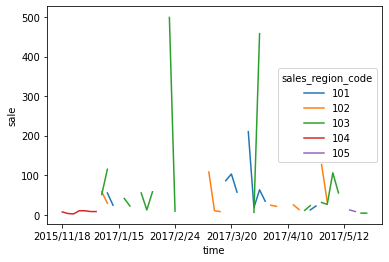

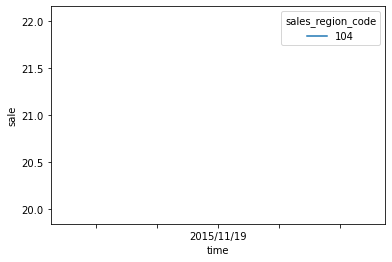

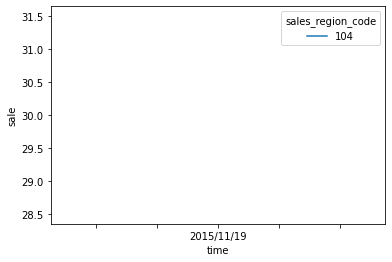

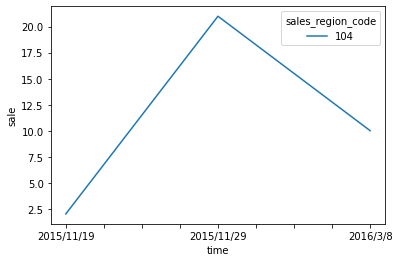

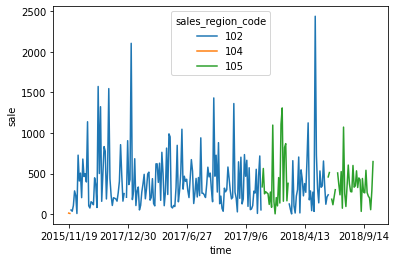

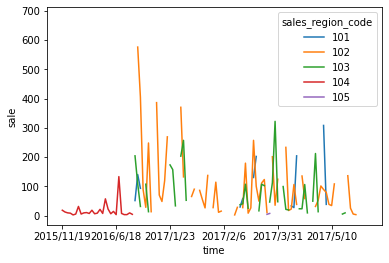

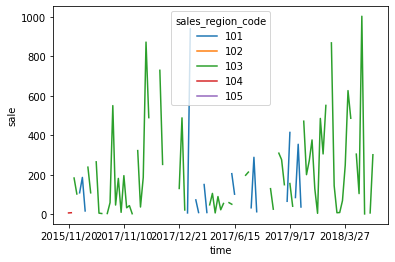

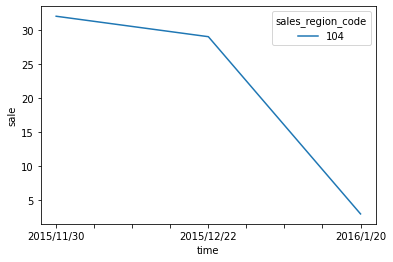

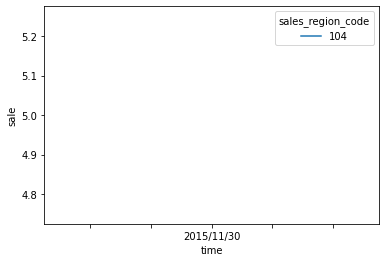

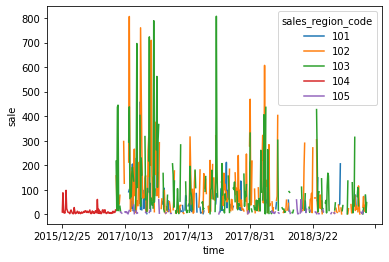

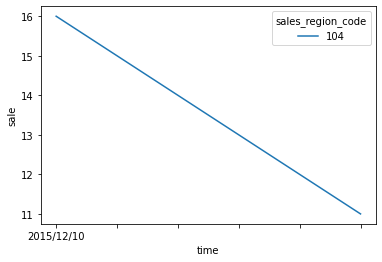

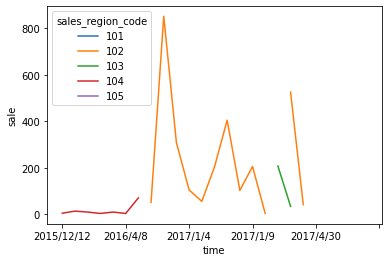

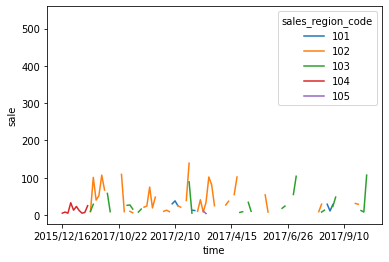

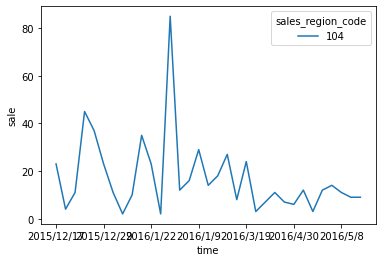

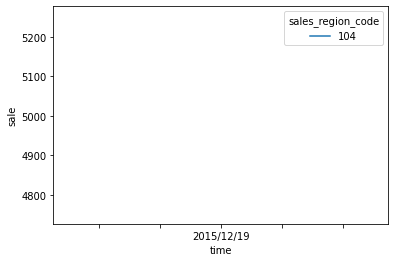

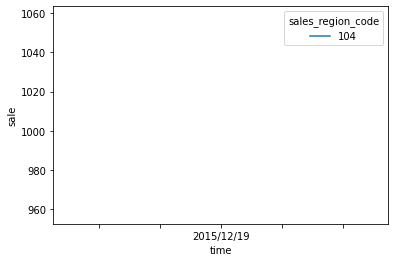

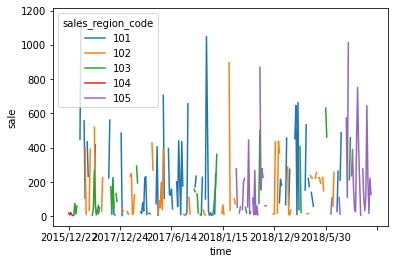

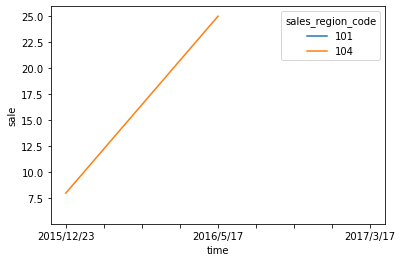

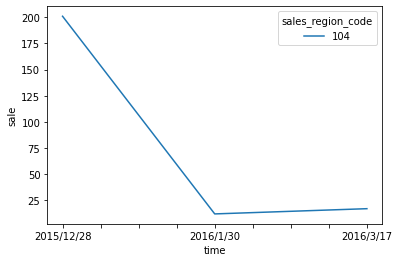

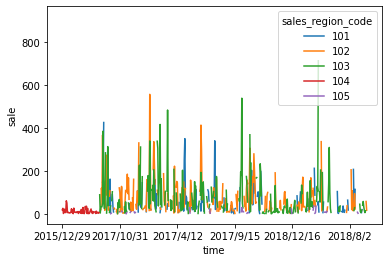

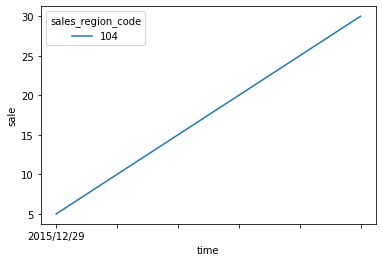

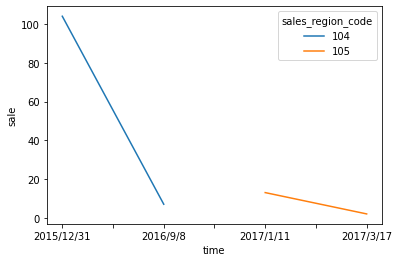

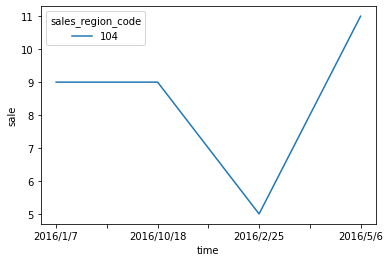

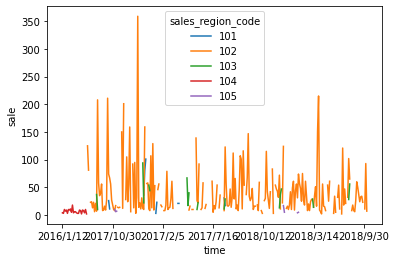

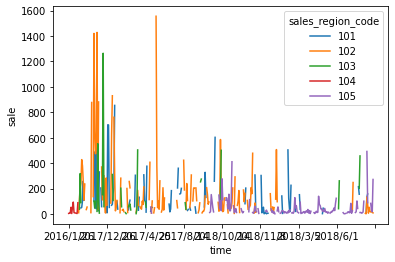

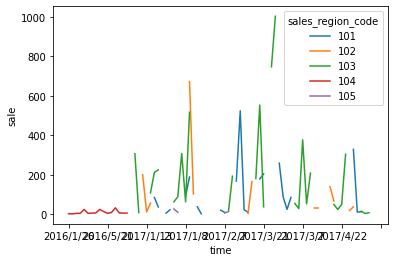

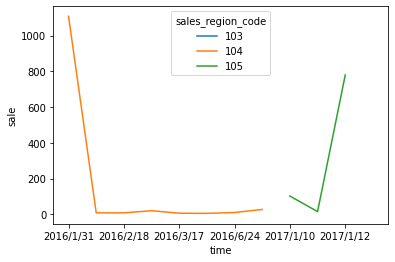

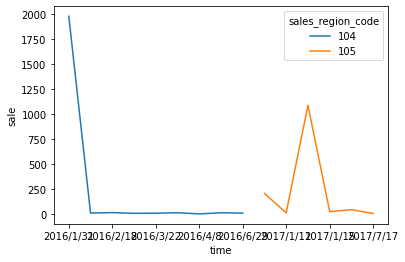

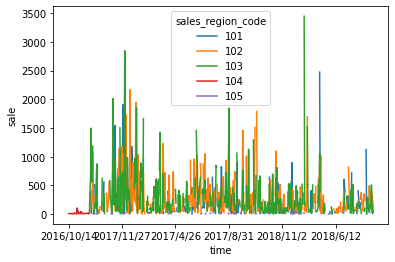

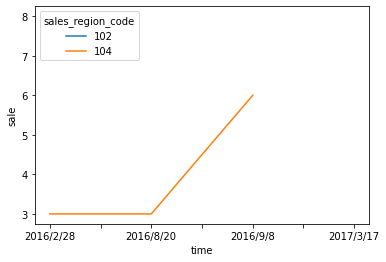

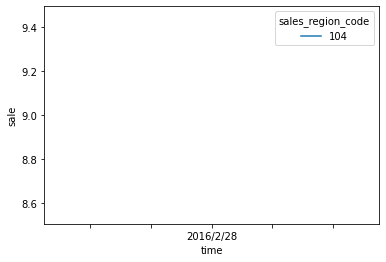

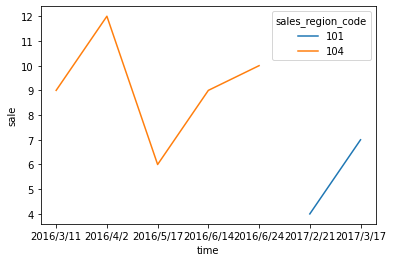

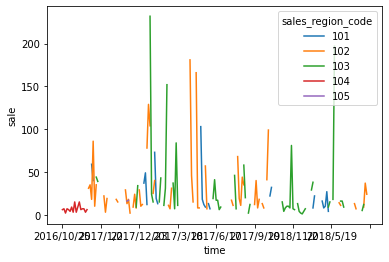

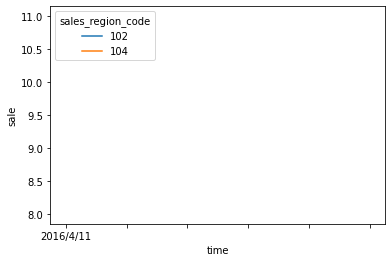

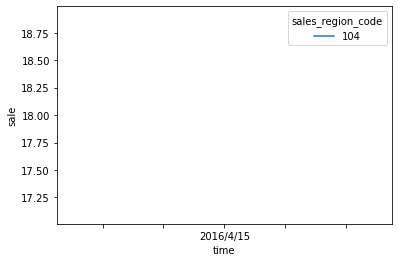

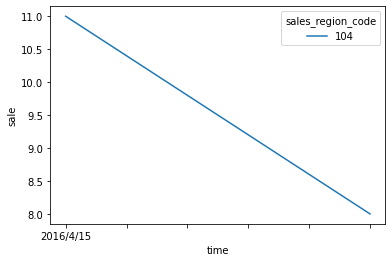

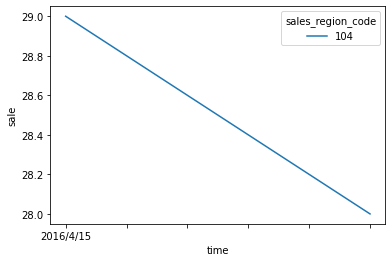

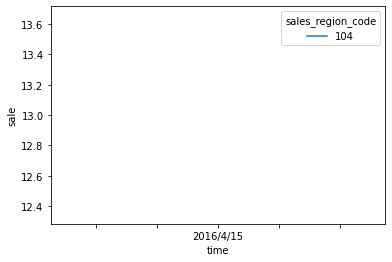

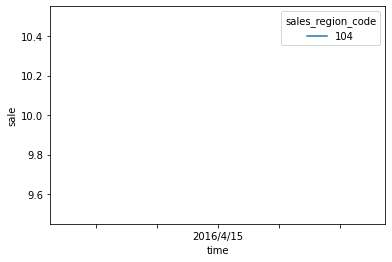

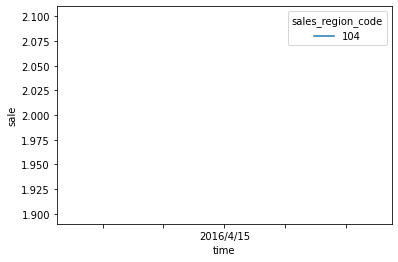

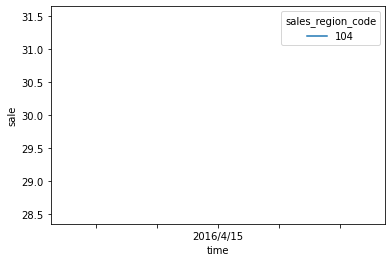

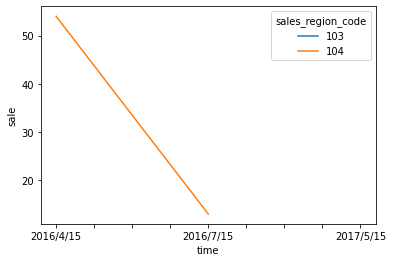

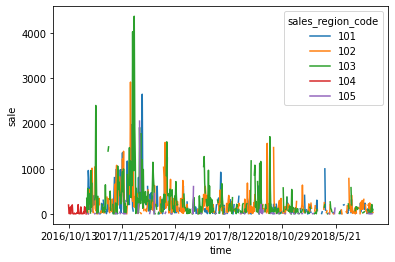

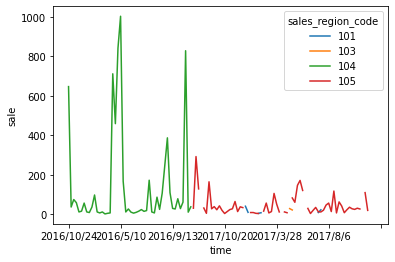

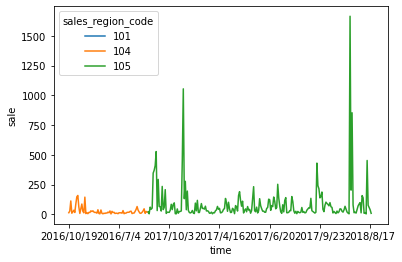

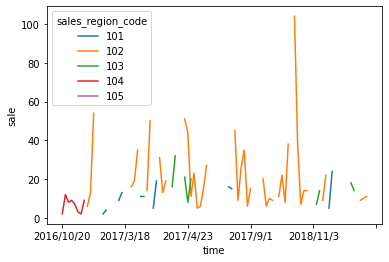

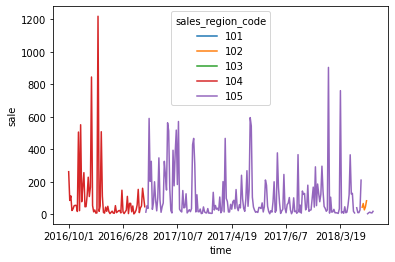

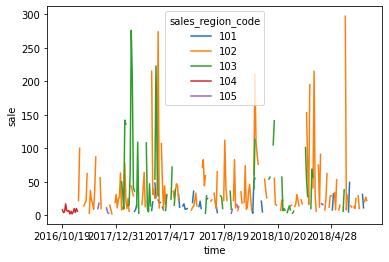

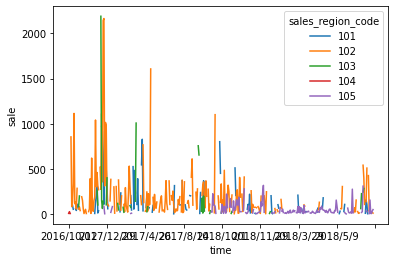

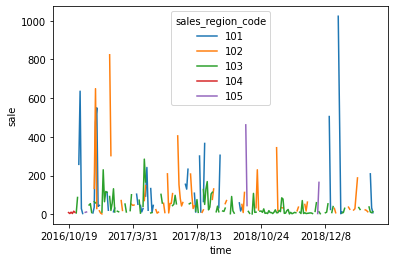

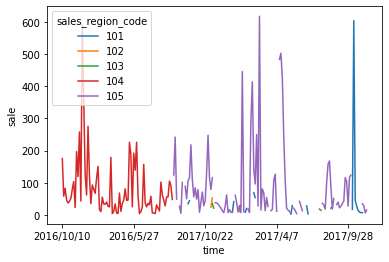

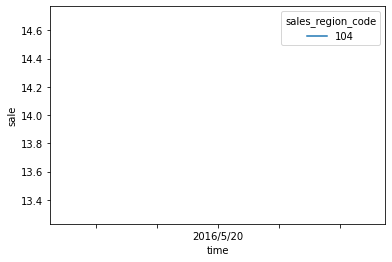

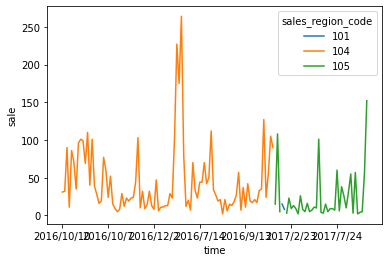

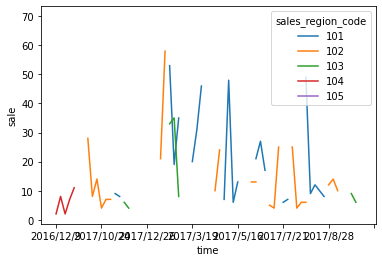

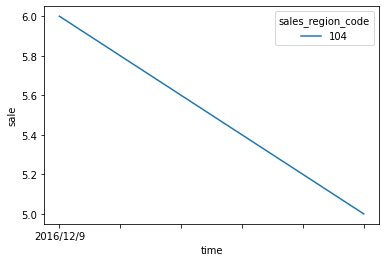

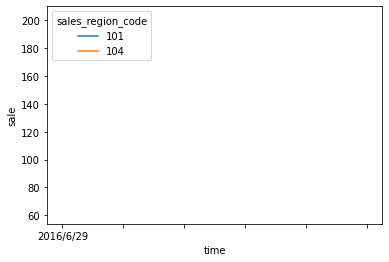

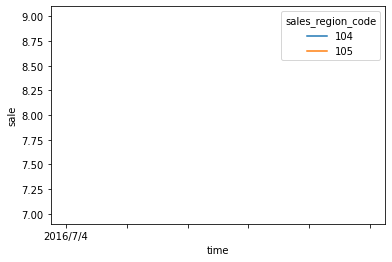

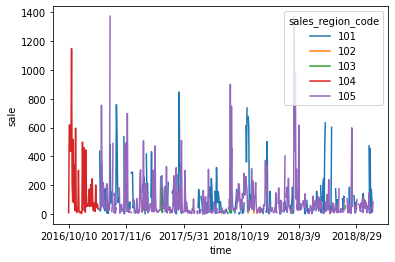

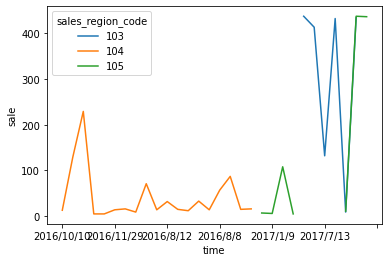

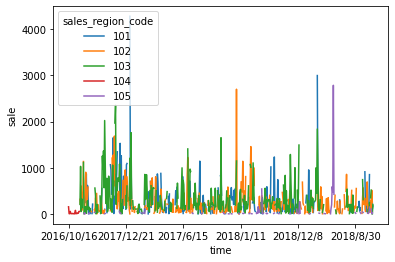

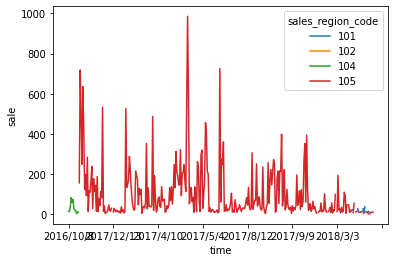

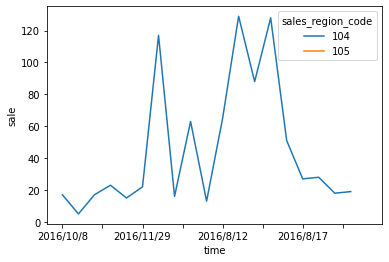

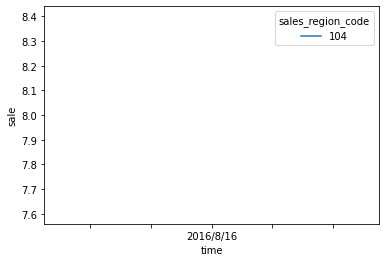

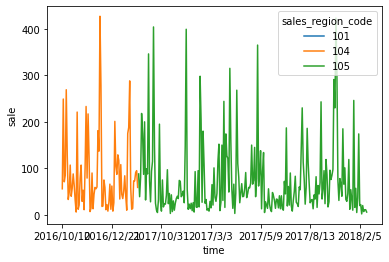

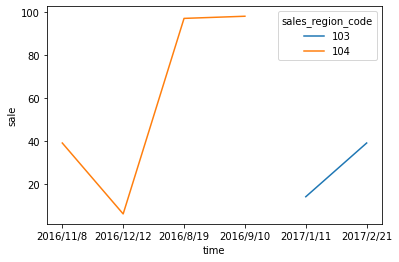

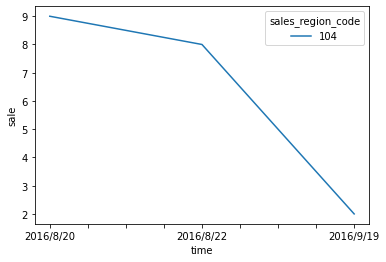

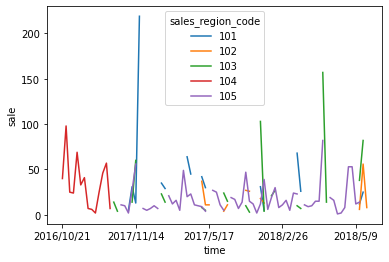

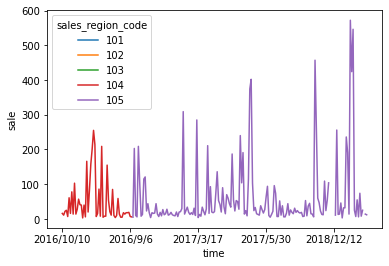

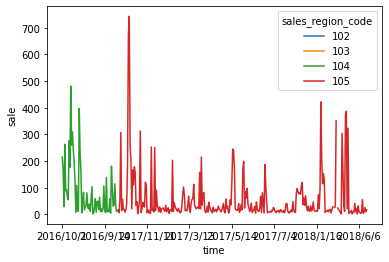

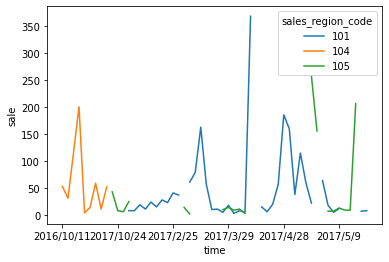

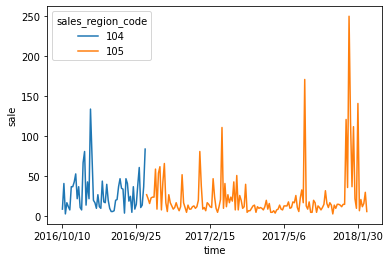

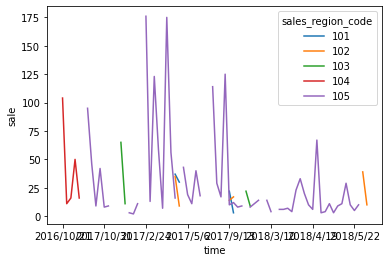

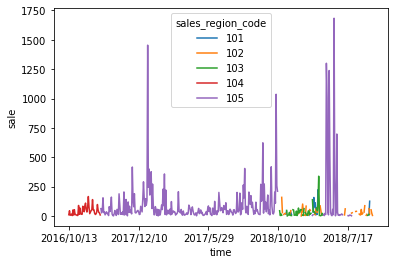

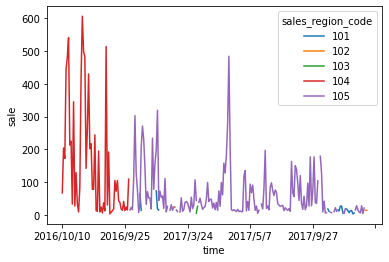

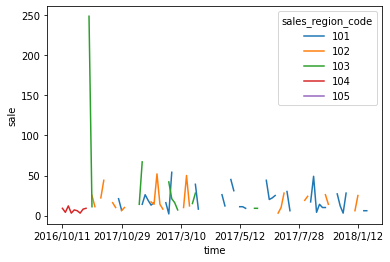

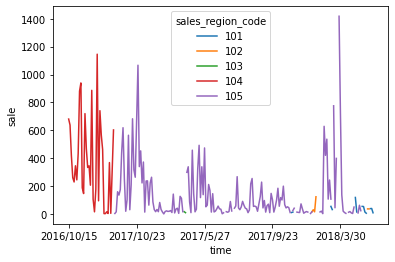

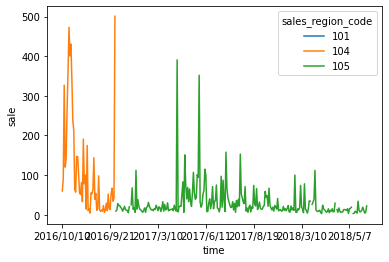

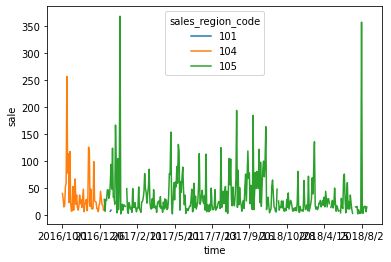

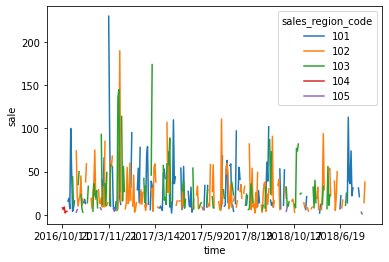

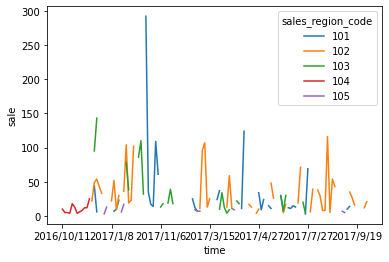

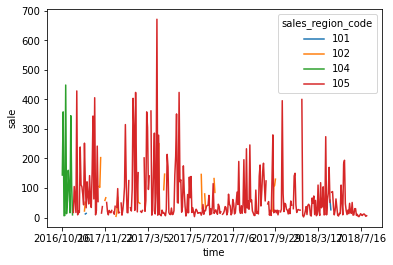

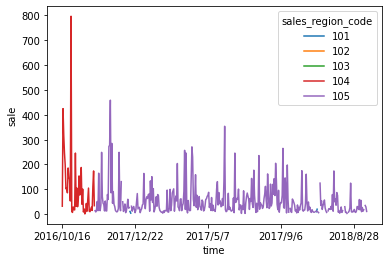

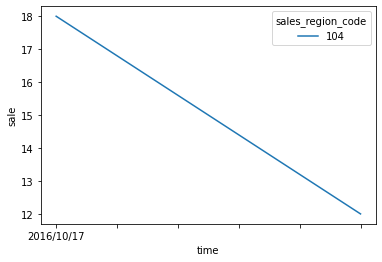

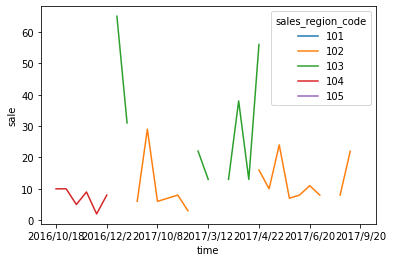

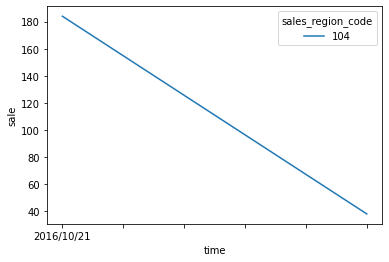

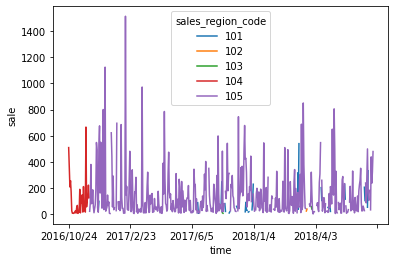

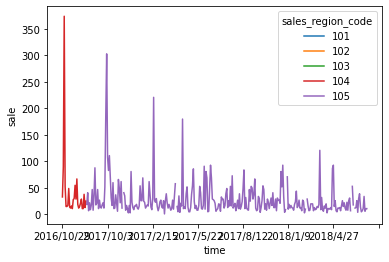

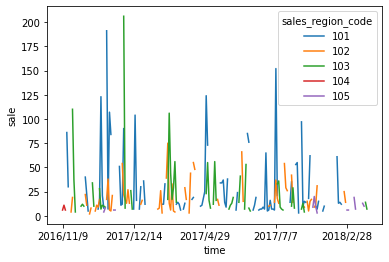

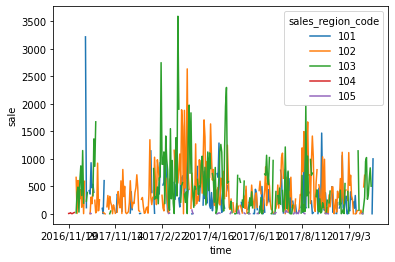

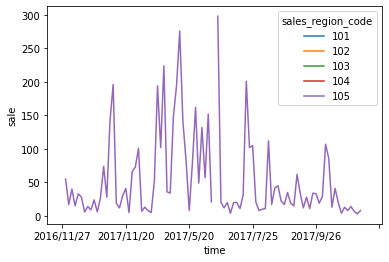

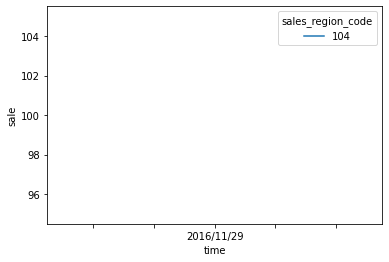

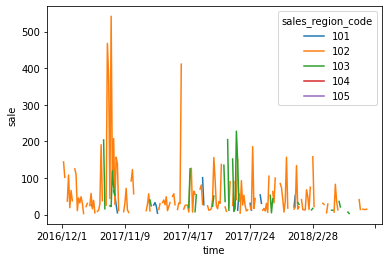

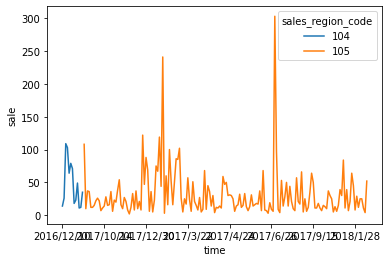

In [6]:
# 分析所有在104地区销售的商品，在各个地区的销售情况，可以看出从104转移到105的商品占比还是挺大的
for item in item_104_list:
    item_df = data[data["item_code"]==item]
    sales_by_region = item_df.groupby(['sales_region_code', 'order_date'])['ord_qty'].sum().unstack(level=0)
#     print(item)

    # 绘制折线图
    fig, ax = plt.subplots()
    sales_by_region.plot(ax=ax)
    ax.set_xlabel('time')
    ax.set_ylabel('sale')
   # plt.show()  # 取消注释画图




In [7]:
# df = data
# # 筛选2017年前在104地区销售占总销量90%以上，2017年后在105地区销售占比80%以上的商品
# cond1 = ((df['order_date'] < '2017-01-01') & (df['sales_region_code'] == 104))
# cond2 = ((df['order_date'] >= '2017-01-01') & (df['sales_region_code'] == 105))
# cond1_ = df[cond1]["item_code"].unique()
# cond2_ = df[cond2]["item_code"].unique()
# cond = set(cond1_).intersection(set(cond2_))
# for item in cond:
#     df_filtered = df.groupby('item_code').filter(lambda x: x.loc[cond, 'ord_qty'].sum() / x['ord_qty'].sum() >= 0.5
#                                                     and x.loc[cond, 'ord_qty'].sum() / x['ord_qty'].sum() >= 0.6    )


In [8]:
# # 统计符合条件的商品数量
# num_items = df_filtered['item_code'].nunique()

# # 分别计算符合条件的商品属于哪种分类
# first_cate_counts = df_filtered.groupby('first_cate_code')['item_code'].nunique()
# second_cate_counts = df_filtered.groupby('second_cate_code')['item_code'].nunique()


In [9]:
# 筛选2017年1月份之后，不在104地区出售的商品，其销量占比该商品80%以上的商品
df1 = data[(data["order_date"] >= "2017-01-01") & (data["sales_region_code"] != 104)]
df1 = df1.groupby(["item_code", "first_cate_code", "second_cate_code","sales_region_code"]).sum().reset_index()
dff = df1.groupby(["item_code"])["ord_qty"].sum() # 每个商品的总销量
dff = dff.to_frame(name='sum_qty')
df1 = pd.merge(df1, dff, on = ["item_code"], how = "left") # 给每个商品赋上棕销量
df1 = df1[df1["ord_qty"] / df1["sum_qty"] >= 0.5]
df1

# 选出在105地区出售的 可以不选
df1 = df1[df1["sales_region_code"]==105]
df1

item_code  first_cate_code  second_cate_code  sales_region_code  \
3         20002              303               406                105   
7         20003              301               405                105   
10        20005              306               407                105   
14        20006              307               403                105   
56        20024              306               402                105   
...         ...              ...               ...                ...   
4255      22057              304               409                105   
4259      22058              302               408                105   
4285      22072              305               412                105   
4288      22078              306               407                105   
4292      22080              306               407                105   

      item_price  ord_qty  sum_qty  
3      696058.00     4653     8807  
7     1297811.74   186067   219664  
10        741.00       21       34  
14     546472.06    54111    60622  
56     157681.11    38419    47948  
...          ...      ...      ...  
4255    29518.00      599      599  
4259   615991.40    23854    29150  
4285    24310.00     3762     3762  
4288    76871.00      855      904  
4292   449121.40   160334   174863  

[447 rows x 7 columns]

In [10]:
# 筛选2017年1月份之前，在104地区出售，销量占比达到80%以上的商品
df2 = data[(data["order_date"] < "2017-01-01")]
df2 = df2.groupby(["item_code", "first_cate_code", "second_cate_code","sales_region_code"]).sum().reset_index()
dff = df2.groupby(["item_code"])["ord_qty"].sum() # 每个商品的总销量
dff = dff.to_frame(name='sum_qty')
df2 = pd.merge(df2, dff, on = ["item_code"], how = "left") # 给每个商品赋上棕销量
df2 = df2[df2["ord_qty"] / df2["sum_qty"] >= 0.7]
# 选出在104地区出售的
df2 = df2[df2["sales_region_code"]==104]
df2

item_code  first_cate_code  second_cate_code  sales_region_code  \
4         20003              301               405                104   
9         20006              307               403                104   
30        20015              308               404                104   
47        20023              307               403                104   
51        20027              301               405                104   
...         ...              ...               ...                ...   
2604      22050              308               404                104   
2617      22065              307               403                104   
2622      22069              307               403                104   
2627      22073              301               405                104   
2635      22077              307               403                104   

      item_price  ord_qty  sum_qty  
4       738658.1    90456    90456  
9       369477.2    35496    35496  
30       11431.0      540      540  
47       35863.0     1237     1237  
51       16244.0      155      155  
...          ...      ...      ...  
2604    359754.0    16027    16027  
2617      6963.0       44       44  
2622      8640.0       86       86  
2627      1897.0       15       15  
2635       246.0       30       30  

[257 rows x 7 columns]

In [11]:
# 合并两个数据集，找出同时满足两个条件的商品
result = pd.merge(df1, df2, on=["item_code", "first_cate_code", "second_cate_code"])
selected_item_code = result["item_code"] # 序列

In [12]:
for i in selected_item_code:
    print(i)

20003
20006
20038
20074
20083
20085
20150
20169
20179
20219
20280
20340
20367
20380
20437
20448
20476
20491
20512
20535
20544
20634
20668
20740
20763
20768
20796
20803
20830
20862
20865
20877
20911
20926
20935
20937
20944
20949
20986
21016
21031
21049
21061
21081
21107
21124
21128
21142
21173
21179
21181
21183
21246
21247
21264
21296
21316
21326
21332
21446
21524
21551
21566
21594
21636
21651
21654
21706
21716
21731
21756
21801
21828
21872
21921
21961
21973
21986
22021
22040
22050


In [13]:
# 补充一些观察到的漏网之鱼
selected_item_code = selected_item_code.append(pd.Series([20416]))
selected_item_code = selected_item_code.append(pd.Series([21836]))



In [14]:

# 统计符合条件的商品数量，并按照大类编码进行分组
grouped = result.groupby("first_cate_code")["item_code"].nunique().reset_index()
grouped.columns = ["大类编码", "商品数量"]

print(grouped)
# 统计符合条件的商品数量，并按照小类编码进行分组
grouped = result.groupby("second_cate_code")["item_code"].nunique().reset_index()
grouped.columns = ["小类编码", "商品数量"]

print(grouped)

   大类编码  商品数量
0   301     8
1   304    16
2   307    24
3   308    33
   小类编码  商品数量
0   403    24
1   404    33
2   405     8
3   409    16


20003


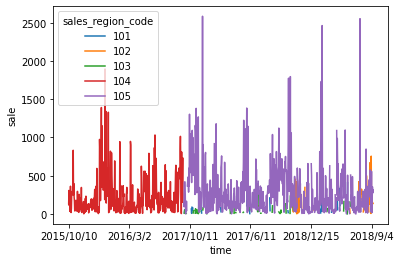

20006


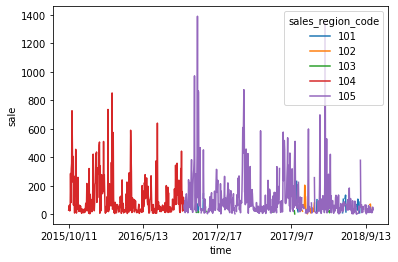

20038


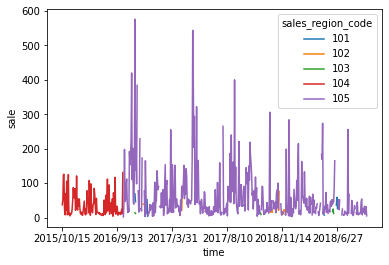

20074


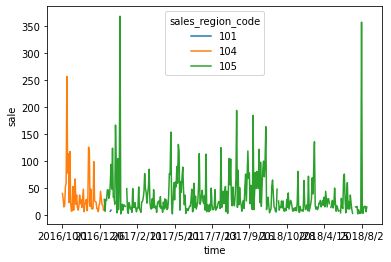

20083


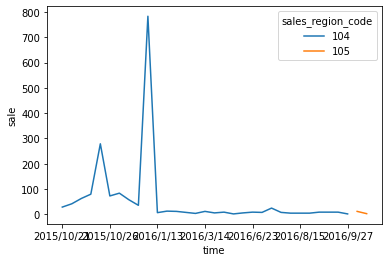

20085


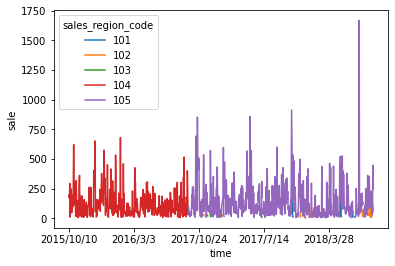

20150


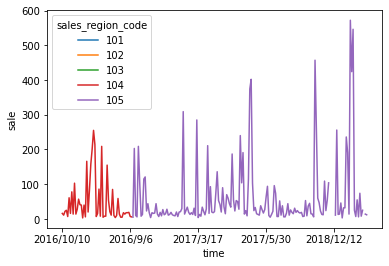

20169


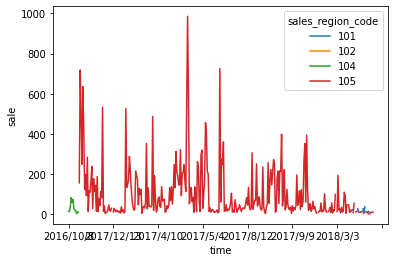

20179


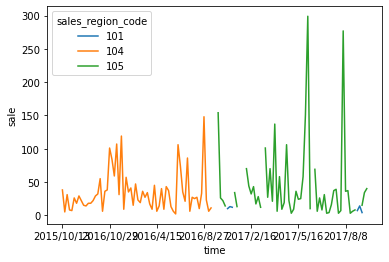

20219


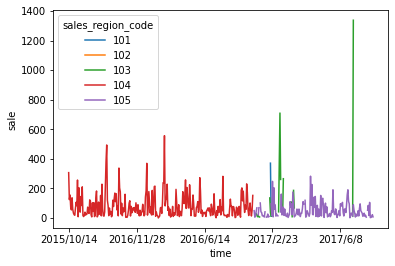

20280


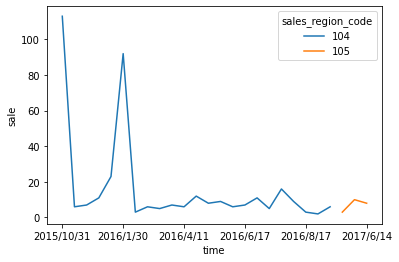

20340


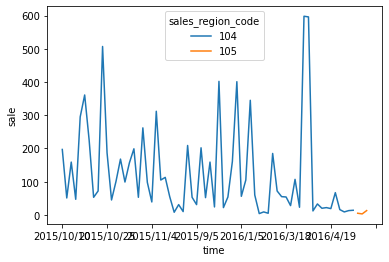

20367


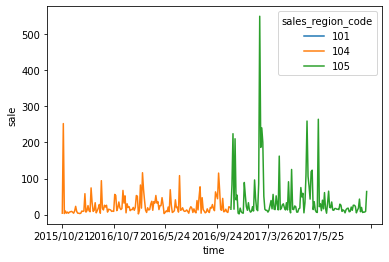

20380


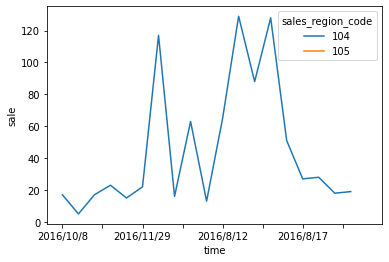

20437


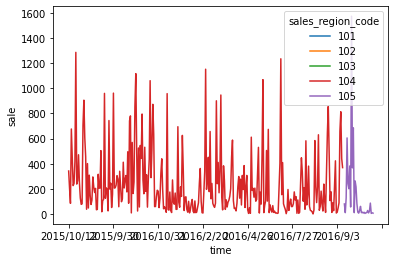

20448


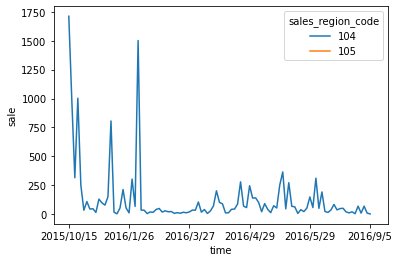

20476


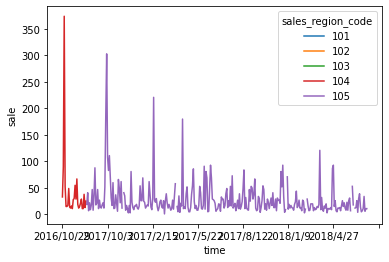

20491


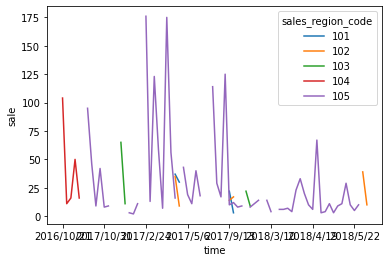

20512


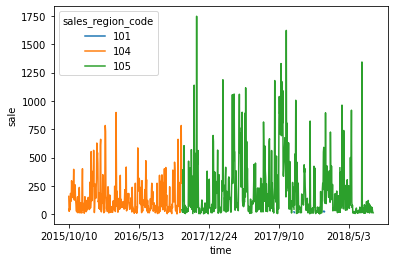

20535


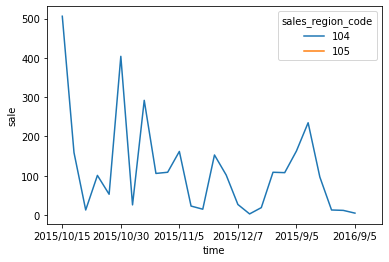

20544


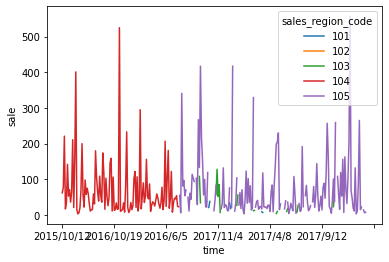

20634


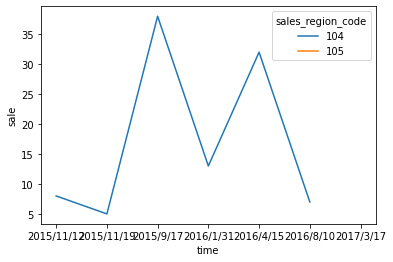

20668


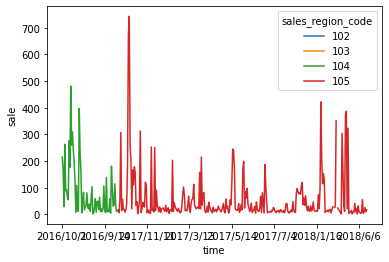

20740


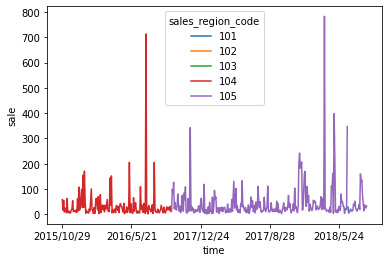

20763


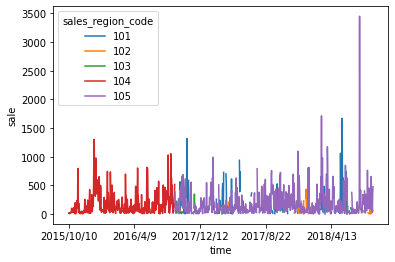

20768


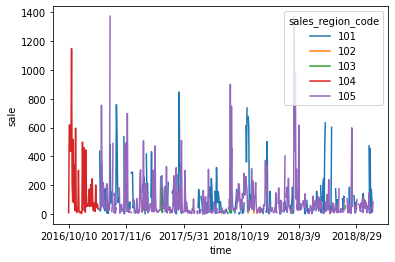

20796


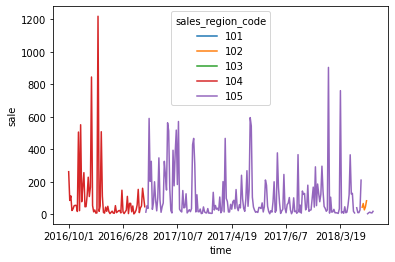

20803


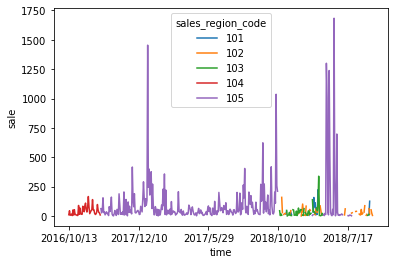

20830


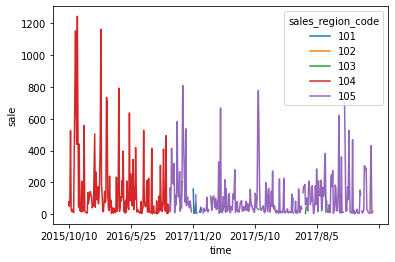

20862


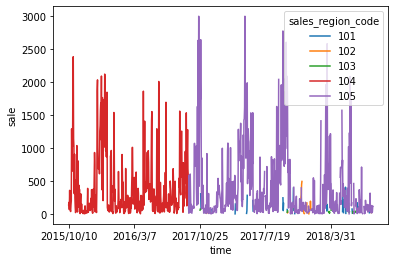

20865


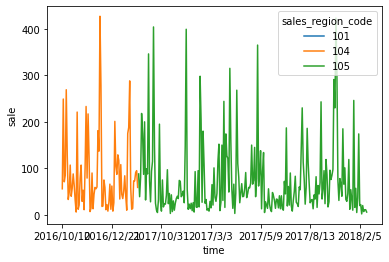

20877


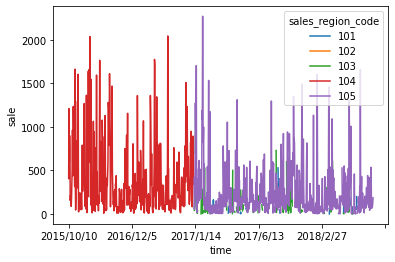

20911


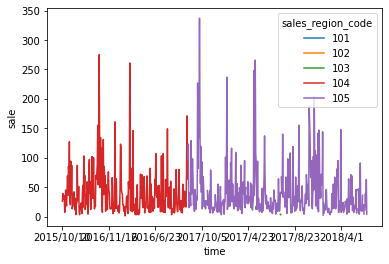

20926


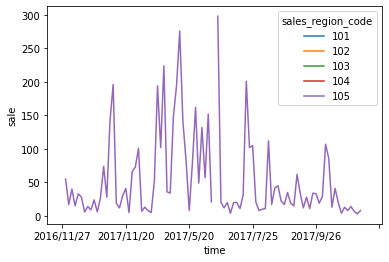

20935


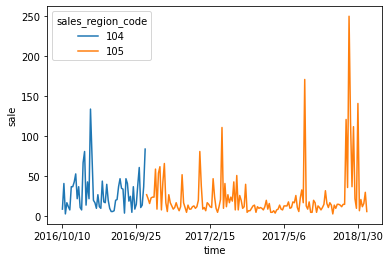

20937


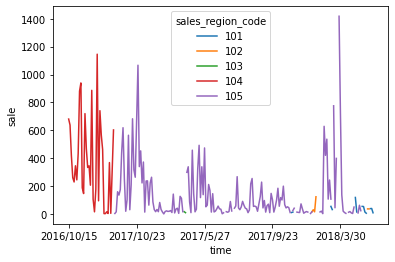

20944


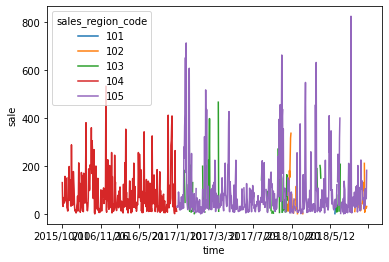

20949


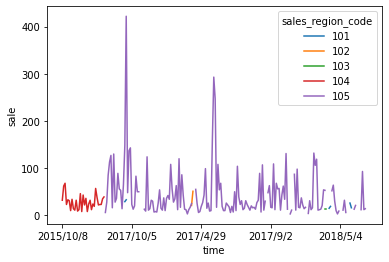

20986


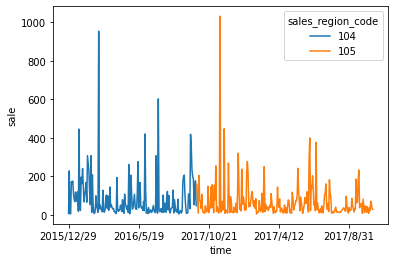

21016


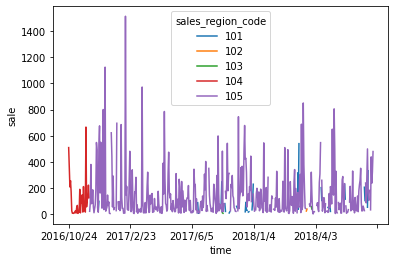

21031


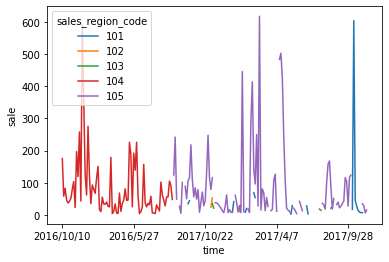

21049


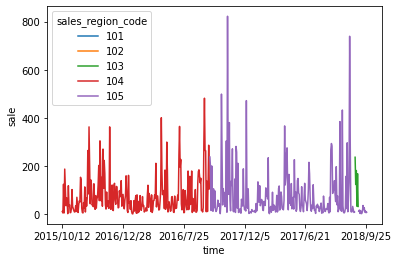

21061


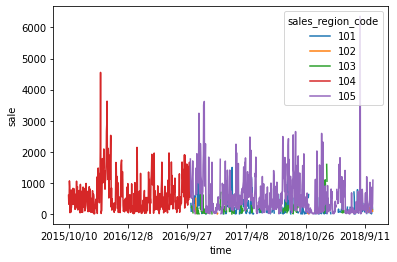

21081


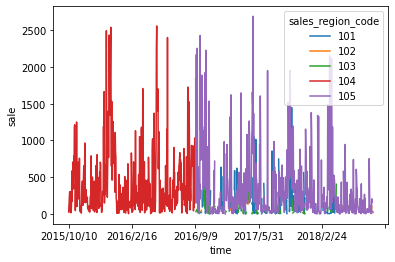

21107


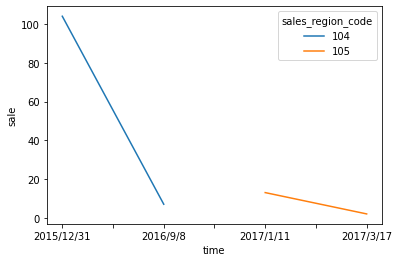

21124


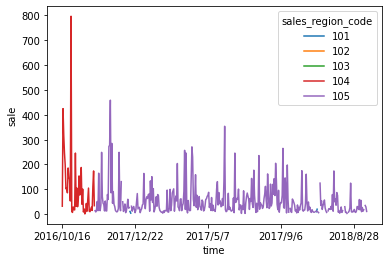

21128


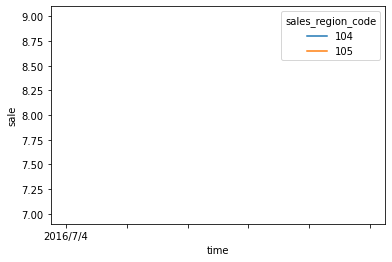

21142


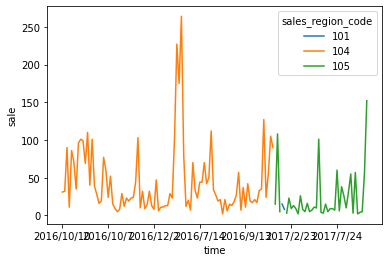

21173


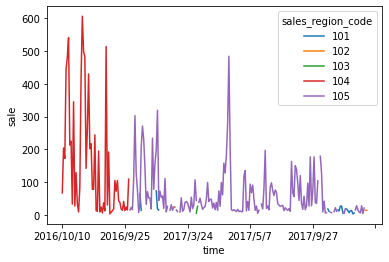

21179


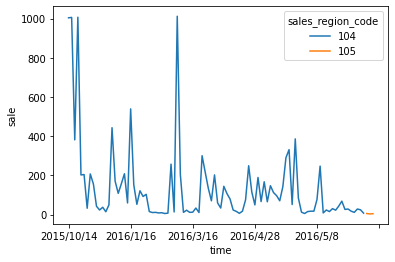

21181


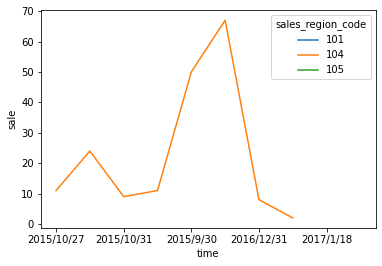

21183


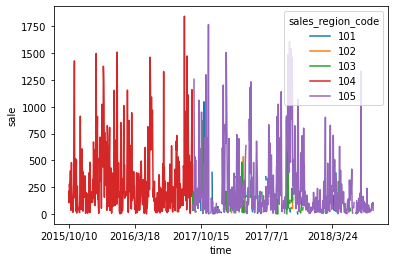

21246


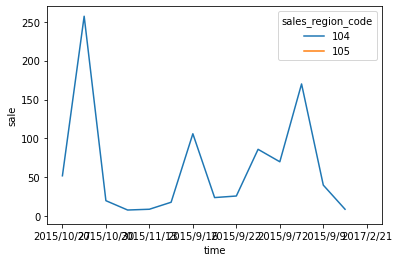

21247


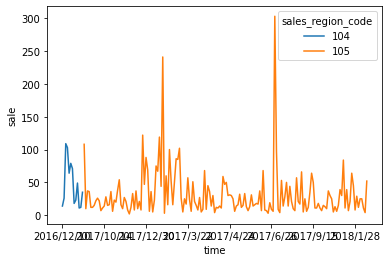

21264


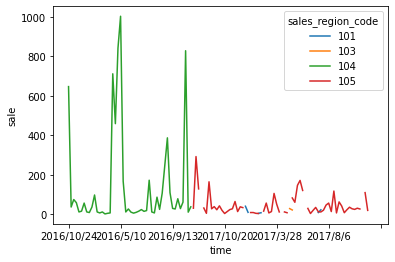

21296


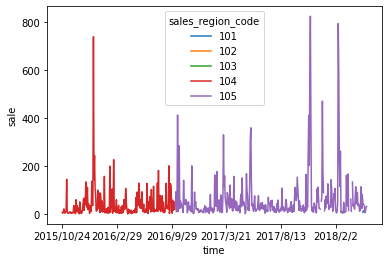

21316


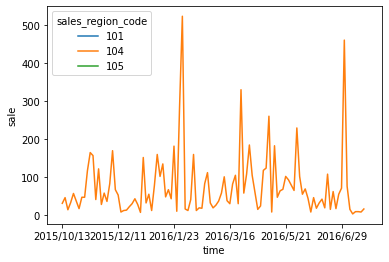

21326


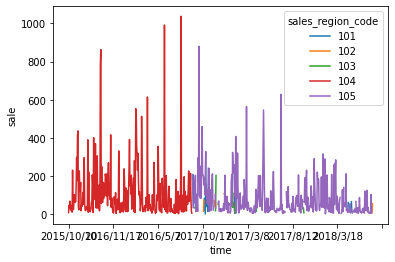

21332


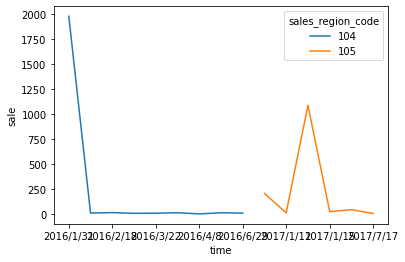

21446


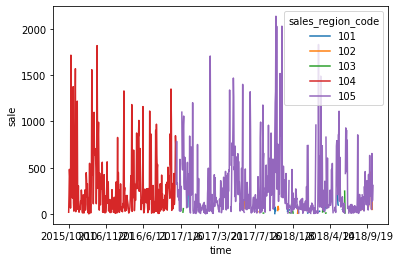

21524


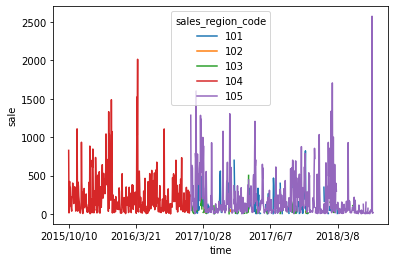

21551


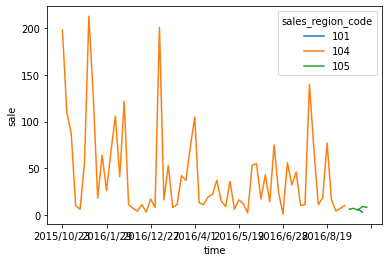

21566


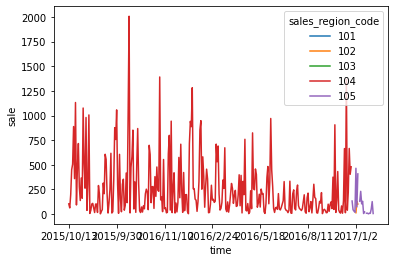

21594


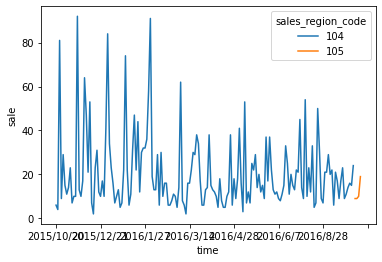

21636


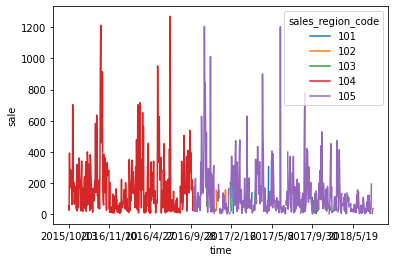

21651


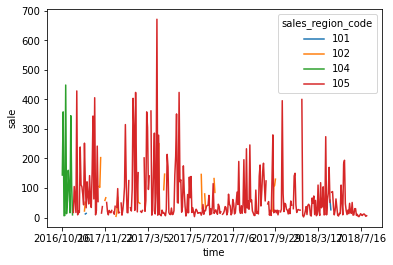

21654


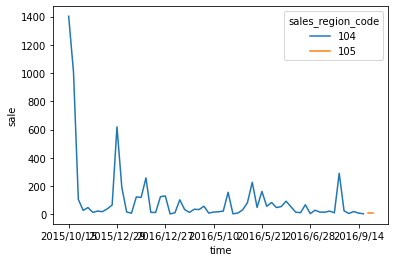

21706


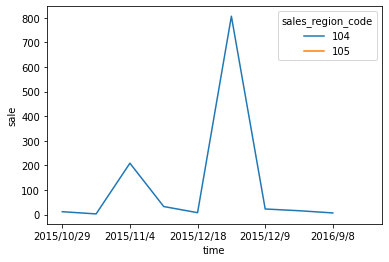

21716


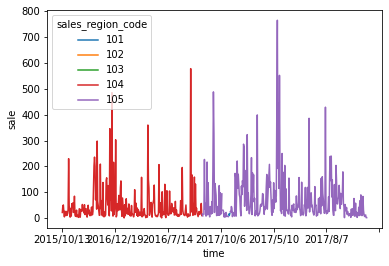

21731


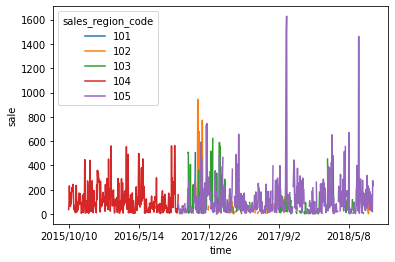

21756


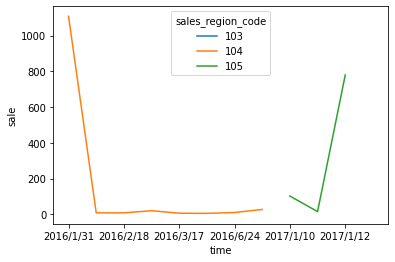

21801


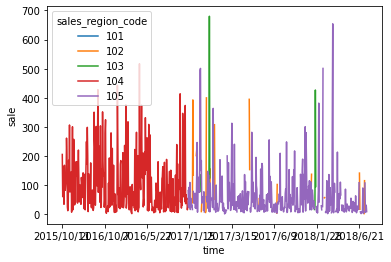

21828


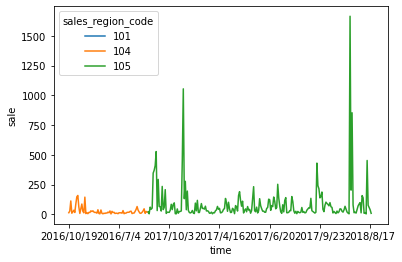

21872


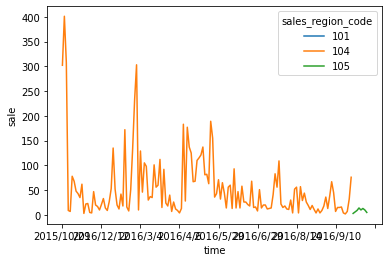

21921


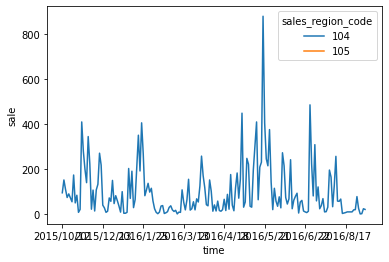

21961


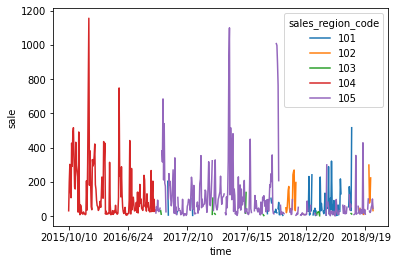

21973


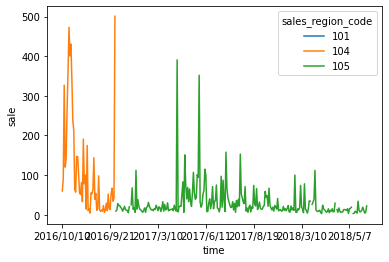

21986


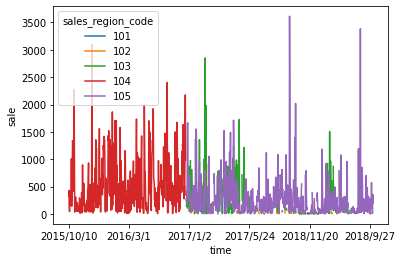

22021


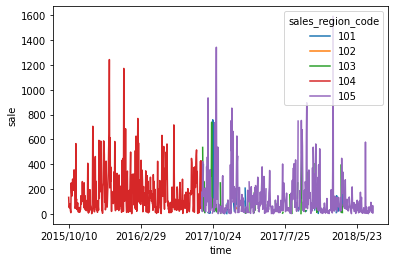

22040


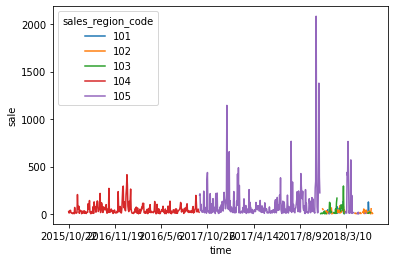

22050


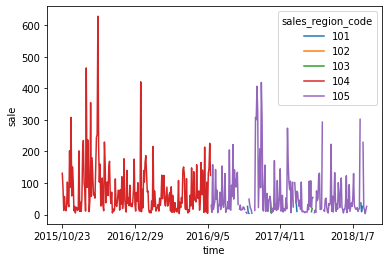

20416


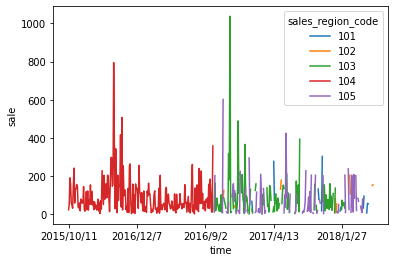

21836


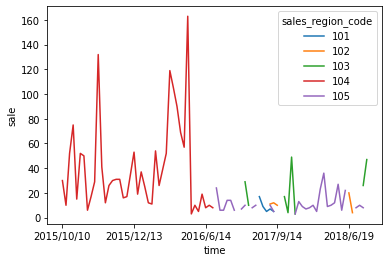

In [15]:
# 可视化验证一下 

for item in selected_item_code:
    item_df = data[data["item_code"]==item]
    sales_by_region = item_df.groupby(['sales_region_code', 'order_date'])['ord_qty'].sum().unstack(level=0)
    print(item)

    # 绘制折线图
    fig, ax = plt.subplots()
    sales_by_region.plot(ax=ax)
    ax.set_xlabel('time')
    ax.set_ylabel('sale')
    plt.show()  # 取消注释画图
#     plt.savefig("./图片/104转105代表商品20085.png",dpi=150)

 

将selected_item_code里面的，数据，补充到对应的商品的105的前面

In [16]:
len(selected_item_code)

83

In [17]:
df = data.copy()

In [18]:

for item in selected_item_code:
    mask = (df["item_code"]==item) & (df["sales_region_code"]==104)
    df.loc[mask,"sales_region_code"] = 105
    print(f"{item}已完成替换")


20003已完成替换
20006已完成替换
20038已完成替换
20074已完成替换
20083已完成替换
20085已完成替换
20150已完成替换
20169已完成替换
20179已完成替换
20219已完成替换
20280已完成替换
20340已完成替换
20367已完成替换
20380已完成替换
20437已完成替换
20448已完成替换
20476已完成替换
20491已完成替换
20512已完成替换
20535已完成替换
20544已完成替换
20634已完成替换
20668已完成替换
20740已完成替换
20763已完成替换
20768已完成替换
20796已完成替换
20803已完成替换
20830已完成替换
20862已完成替换
20865已完成替换
20877已完成替换
20911已完成替换
20926已完成替换
20935已完成替换
20937已完成替换
20944已完成替换
20949已完成替换
20986已完成替换
21016已完成替换
21031已完成替换
21049已完成替换
21061已完成替换
21081已完成替换
21107已完成替换
21124已完成替换
21128已完成替换
21142已完成替换
21173已完成替换
21179已完成替换
21181已完成替换
21183已完成替换
21246已完成替换
21247已完成替换
21264已完成替换
21296已完成替换
21316已完成替换
21326已完成替换
21332已完成替换
21446已完成替换
21524已完成替换
21551已完成替换
21566已完成替换
21594已完成替换
21636已完成替换
21651已完成替换
21654已完成替换
21706已完成替换
21716已完成替换
21731已完成替换
21756已完成替换
21801已完成替换
21828已完成替换
21872已完成替换
21921已完成替换
21961已完成替换
21973已完成替换
21986已完成替换
22021已完成替换
22040已完成替换
22050已完成替换
20416已完成替换
21836已完成替换


In [19]:
df.to_csv("./示例数据/order_train2.csv",index=False)

406商品，2018年3月从105地区分到101、102、103地区，所以要预测的话，需要嫁接

In [30]:
data_406 = data[data["second_cate_code"]==406]

In [36]:
df1 = data_406[(data_406["order_date"] >= "2018-03") & (data_406["sales_region_code"].isin([101, 102, 103]))]
df1 = df1.groupby(["item_code", "first_cate_code", "second_cate_code","sales_region_code"]).sum().reset_index()
dff = df1.groupby(["item_code"])["ord_qty"].sum() # 每个商品的总销量
dff = dff.to_frame(name='sum_qty')
df1 = pd.merge(df1, dff, on = ["item_code"], how = "left") # 给每个商品赋上棕销量
df1 = df1[df1["ord_qty"] / df1["sum_qty"] >= 0.4]
df1

# df1 = df1[df1["sales_region_code"].isin([101, 102, 103])]
df1

item_code  first_cate_code  second_cate_code  sales_region_code  \
2       20002              303               406                103   
8       20394              303               406                103   
11      20461              303               406                103   
17      20567              303               406                103   
20      20782              303               406                103   
22      21036              303               406                102   
23      21036              303               406                103   
26      21123              303               406                103   
28      21357              303               406                102   
29      21357              303               406                103   
31      21411              303               406                102   
35      21460              303               406                103   
38      21552              303               406                103   
41      21757              303               406                103   

    item_price  ord_qty  sum_qty  
2     356070.0     2830     4106  
8      93376.0      270      513  
11    162670.0      808     1425  
17    215882.0      354      883  
20     78329.0      237      515  
22     22916.0       76      139  
23     13095.0       57      139  
26    291273.0     1211     2320  
28     10903.0       50       88  
29      7854.0       37       88  
31     23407.0       92      204  
35    136952.0      678     1343  
38    115618.0      666     1015  
41    273137.0     2642     3774

In [37]:
# 筛选2018年3月份之前，在105地区出售，销量占比达到80%以上的商品
df2 = data_406[(data_406["order_date"] < "2018-03")& (data_406["sales_region_code"]==105)]
df2 = df2.groupby(["item_code", "first_cate_code", "second_cate_code","sales_region_code"]).sum().reset_index()
dff = df2.groupby(["item_code"])["ord_qty"].sum() # 每个商品的总销量
dff = dff.to_frame(name='sum_qty')
df2 = pd.merge(df2, dff, on = ["item_code"], how = "left") # 给每个商品赋上棕销量
df2 = df2[df2["ord_qty"] / df2["sum_qty"] >= 0.8]
# # 选出在104地区出售的
df2 = df2[df2["sales_region_code"]==105]
df2

item_code  first_cate_code  second_cate_code  sales_region_code  \
0      20002              303               406                105   
1      20251              303               406                105   
2      20461              303               406                105   
3      20527              303               406                105   
4      20567              303               406                105   
5      21123              303               406                105   
6      21411              303               406                105   
7      21552              303               406                105   

   item_price  ord_qty  sum_qty  
0    549591.0     3398     3398  
1    240524.0      868      868  
2    397462.5     1963     1963  
3   1349975.0     7352     7352  
4    282473.0      585      585  
5     17205.0       78       78  
6     17392.0      152      152  
7    834490.0     6254     6254

In [38]:
# 合并两个数据集，找出同时满足两个条件的商品
result = pd.merge(df1, df2, on=["item_code", "first_cate_code", "second_cate_code"])
selected_item_code = result["item_code"] # 序列

In [39]:

# 统计符合条件的商品数量，并按照大类编码进行分组
grouped = result.groupby("first_cate_code")["item_code"].nunique().reset_index()
grouped.columns = ["大类编码", "商品数量"]

print(grouped)
# 统计符合条件的商品数量，并按照小类编码进行分组
grouped = result.groupby("second_cate_code")["item_code"].nunique().reset_index()
grouped.columns = ["小类编码", "商品数量"]

print(grouped)

   大类编码  商品数量
0   303     6
   小类编码  商品数量
0   406     6


In [68]:
df = data.copy()

In [70]:
for item in selected_item_code:
    for i in [101,102,103]:
        mask = (df["item_code"]==item) & (df["sales_region_code"]==105)&(df["order_date"] < "2018-03")

        mask2 = df.loc[mask]  
#         print(mask2)
        mask2["sales_region_code"] = i
        df = pd.concat([df,mask2],axis=0)
        df.reset_index(inplace=True,drop=True)
#     df.drop(df.loc[mask], inplace=True)
    print(f"{item}已完成替换")


<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i
<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i
<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

20002已完成替换


<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i
<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i


20461已完成替换


<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i
<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i
<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

20567已完成替换


<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i
<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i


21123已完成替换


<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i
<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i
<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

21411已完成替换
21552已完成替换


<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i
<ipython-input-70-8bb75fa1fb2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask2["sales_region_code"] = i


20002


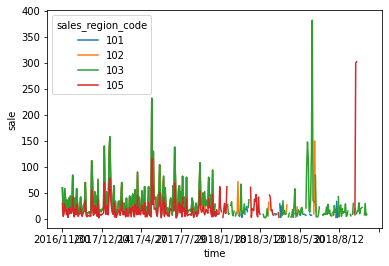

20461


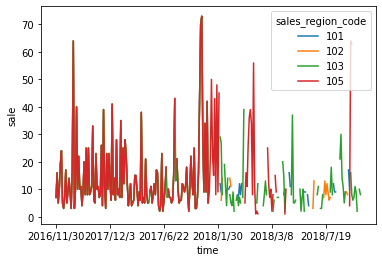

20567


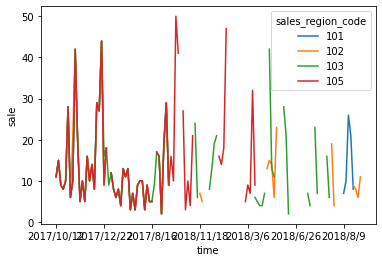

21123


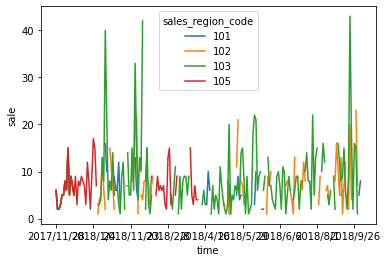

21411


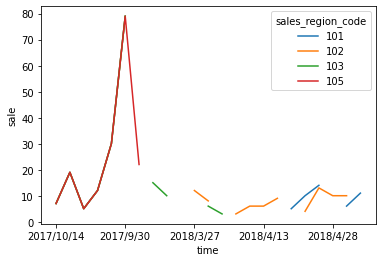

21552


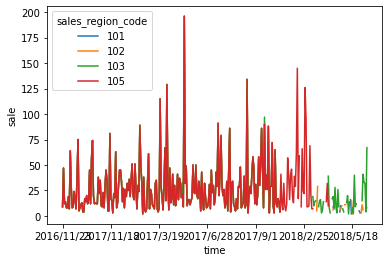

In [72]:
# 可视化验证一下 
data = df
for item in selected_item_code:
    item_df = data[data["item_code"]==item]
    sales_by_region = item_df.groupby(['sales_region_code', 'order_date'])['ord_qty'].sum().unstack(level=0)
    print(item)

    # 绘制折线图
    fig, ax = plt.subplots()
    sales_by_region.plot(ax=ax)
    ax.set_xlabel('time')
    ax.set_ylabel('sale')
    plt.show()  # 取消注释画图
#     plt.savefig("./图片/104转105代表商品20085.png",dpi=150)

 

In [73]:
df.to_csv("./示例数据/order_train3.csv",index=False)